<a href="https://colab.research.google.com/github/Ellizence01/BSC_DPDM2025/blob/main/Another_copy_of_Ch4_Frequent_Patterns_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Python&Data_viz2025/BSC_DPDM2025'

In [4]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1') #encoding= 'latin-1' bc. มีภาษาที่เป็นจุด ๆ บนหัวทำให้ข้อมมูลเละ

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       12/01/2010 08:26       2.55     17850.0  United Kingdom  
1       12/01/2010 08:26       3.39     17850.0  United Kingdom  
2       12/01/2010 08:26       2.75     17850.0  United Kingdom  
3       12/01/2010 08:26       3.39     17850.0  United Kingdom  
4       12/01/2010 08:26       3.39     17850.0  United Kingdom  
...                  ...        ...         ...             ...  
541904  12/09/2011 12:50       0.85     12680.0          France  
541905  12/09/2011 12:50       2.10     12680.0          France  
541906  12/09/2011 12:50       4.15     12680.0          France  
541907  12/09/2011 12:50       4.15     12680.0          France  
541908  12/09/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [7]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## การเตรียมข้อมูลสำหรับ Apriori Algorithm

ข้อมูลที่ใช้มักจะอยู่ในรูปแบบของธุรกรรม (Transactions) โดยแต่ละธุรกรรมจะประกอบไปด้วยชุดของรายการ (Items)

InvoiceNo = รหัสใบเสร็จ, StockCode = รหัสสินค้า, Description = คำอธิบายรายการสินค้า, Quantity = จำนวนชิ้น, InvoiceDate = วันที่ซื้อ, UnitPrice = ราคาต่อหน่วย, CustomerID = รหัสสมาชิกลูกค้า, Country = ประเทศที่ตั้ง กรณีมีหลายสาขา

In [ ]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list) #รวม ให้สินค้ารหัสใบเสร็จเดียวกันมาอยู่ด้วยกัน # จัดกลุ่มข้อมูล .apply(func  ที่จะทำ)
transactions

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 25900, dtype: object

## Association Rules

In [7]:
!pip install apyori

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=3ec0f75e6631bdb5bcdb1e6c4c5df8ffe619acdfa6c806a8fab24c671dfb8072
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [8]:
from apyori import apriori

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [9]:
list(apriori(transactions,min_support = 0.5))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

NameError: name 'transactions' is not defined

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
frequentItemsets = list(apriori(transactions,min_support = 0.065))
frequentItemsets

[RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)]),
 RelationRecord(items=frozenset({'47566'}), support=0.06586872586872587, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'47566'}), confidence=0.06586872586872587, lift=1.0)]),
 RelationRecord(items=frozenset({'85099B'}), support=0.08243243243243244, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.08243243243243244, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.08671814671814672, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.08671814671814672, lift=1.0)])]

In [ ]:
print('Descriptions of the items in the frequent itemsets:')
for record in frequentItemsets:
    for item_code in record.items:
        description = data[data['StockCode'] == item_code]['Description'].iloc[0] if not data[data['StockCode'] == item_code].empty else 'Description not found'
        print(f"Item Code: {item_code}, Description: {description}")

Descriptions of the items in the frequent itemsets:
Item Code: 22423, Description: REGENCY CAKESTAND 3 TIER
Item Code: 47566, Description: PARTY BUNTING
Item Code: 85099B, Description: JUMBO BAG RED RETROSPOT
Item Code: 85123A, Description: WHITE HANGING HEART T-LIGHT HOLDER


In [ ]:
frequentItemsets[0]

RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)])

In [ ]:
frequentItemsets = list(apriori(transactions,min_support = 0.03))
frequentItemsets

[RelationRecord(items=frozenset({'20712'}), support=0.033667953667953665, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.033667953667953665, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.03254826254826255, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.03254826254826255, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04054054054054054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04054054054054054, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.062084942084942085, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.062084942084942085, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04003861003861004, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [ ]:
frequentItemsets[-1]

RelationRecord(items=frozenset({'22699', '22697'}), support=0.03027027027027027, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])

In [ ]:
frequentItemsets[-2][2][1]

OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335)

In [ ]:
frequentItemsets[-1][0]

frozenset({'22697', '22699'})

In [ ]:
len(frequentItemsets[-1][0])

2

In [ ]:
min_sup = 0.03

frequentItemsets = list(apriori(transactions,min_support = min_sup))
for i in frequentItemsets:
    if len(i[0])>1: #check ที่มากกว่า 2
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03216216216216216, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0), OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])
yes
RelationRecord(items=frozenset({'22699', '22697'}), support=0.03027027027027027, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])


RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03216216216216216,
ordered_statistics=
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0),

OrderedStatistic(items_base=frozenset({'22386'}),items_add=frozenset({'85099B'}),
confidence=0.6766856214459789, lift=8.20897311262335),

OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}),
confidence=0.39016393442622943, lift=8.20897311262335)])


In [ ]:
data[data['StockCode']=='85099B']

InvoiceNo StockCode              Description  Quantity  \
177       536386    85099B  JUMBO BAG RED RETROSPOT       100   
234       536390    85099B  JUMBO BAG RED RETROSPOT       100   
533       536409    85099B  JUMBO BAG RED RETROSPOT         2   
790       536464    85099B  JUMBO BAG RED RETROSPOT         1   
1069      536522    85099B  JUMBO BAG RED RETROSPOT         1   
...          ...       ...                      ...       ...   
538603    581412    85099B  JUMBO BAG RED RETROSPOT         3   
538913    581421    85099B  JUMBO BAG RED RETROSPOT         9   
539338    581439    85099B  JUMBO BAG RED RETROSPOT         1   
540434    581486    85099B  JUMBO BAG RED RETROSPOT        10   
541536    581498    85099B  JUMBO BAG RED RETROSPOT         5   

             InvoiceDate  UnitPrice  CustomerID         Country  
177     12/01/2010 09:57       1.65     16029.0  United Kingdom  
234     12/01/2010 10:19       1.65     17511.0  United Kingdom  
533     12/01/2010 11:45       1.95     17908.0  United Kingdom  
790     12/01/2010 12:23       1.95     17968.0  United Kingdom  
1069    12/01/2010 12:49       1.95     15012.0  United Kingdom  
...                  ...        ...         ...             ...  
538603  12/08/2011 14:38       2.08     14415.0  United Kingdom  
538913  12/08/2011 15:23       2.08     15898.0  United Kingdom  
539338  12/08/2011 16:30       4.13         NaN  United Kingdom  
540434  12/09/2011 09:38       2.08     17001.0  United Kingdom  
541536  12/09/2011 10:26       4.13         NaN  United Kingdom  

[2159 rows x 8 columns]

In [ ]:
data[data['StockCode']=='22386']

InvoiceNo StockCode              Description  Quantity  \
86        536378     22386  JUMBO BAG PINK POLKADOT        10   
789       536464     22386  JUMBO BAG PINK POLKADOT         1   
1428      536542     22386  JUMBO BAG PINK POLKADOT        30   
2427      536591     22386  JUMBO BAG PINK POLKADOT         1   
2712      536592     22386  JUMBO BAG PINK POLKADOT         3   
...          ...       ...                      ...       ...   
534742    581167     22386  JUMBO BAG PINK POLKADOT        20   
537138    581238     22386  JUMBO BAG PINK POLKADOT         5   
539585    581439     22386  JUMBO BAG PINK POLKADOT         2   
541421    581498     22386  JUMBO BAG PINK POLKADOT         1   
541806    581579     22386  JUMBO BAG PINK POLKADOT        10   

             InvoiceDate  UnitPrice  CustomerID         Country  
86      12/01/2010 09:37       1.95     14688.0  United Kingdom  
789     12/01/2010 12:23       1.95     17968.0  United Kingdom  
1428    12/01/2010 14:11       1.95     16456.0  United Kingdom  
2427    12/01/2010 16:57       1.95     14606.0  United Kingdom  
2712    12/01/2010 17:06       4.21         NaN  United Kingdom  
...                  ...        ...         ...             ...  
534742  12/07/2011 14:52       2.08     13534.0  United Kingdom  
537138  12/08/2011 10:53       4.13         NaN  United Kingdom  
539585  12/08/2011 16:30       4.13         NaN  United Kingdom  
541421  12/09/2011 10:26       4.13         NaN  United Kingdom  
541806  12/09/2011 12:19       1.79     17581.0  United Kingdom  

[1251 rows x 8 columns]

**k-itemset**: สินค้า k ชนิดถูกซื้อร่วมกันบ่อยแค่ไหน  
(relative (%)) **support**: หลักฐาน ที่สนับสนุนสมมติฐานที่เราตั้งไว้ ว่ามีกี่ชิ้น (มีกี่ transection ที่มาทดสอบสมมติฐานเรา)  
**min_support**: pattern ที่น่าสนใจคือ pattern ที่เกิดขึ้นบ่อยเท่าที่เราต้องการ (กำหนด threshold)  
**confident** conditional probability ดูว่าเกิดอันไหนก่อน หลัง  
**lift**: หาความสัมพันธ์

# HW 2 หา pattern ที่น่าสนใจใน Dataset หนังอินเดีย (india imdb)

In [8]:
India_data = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'),encoding='latin-1')
India_data

Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]

## ตรวจสอบ + จัดการค่าว่าง

In [9]:
India_data.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [10]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
# คำนวณสัดส่วนของค่าว่างในแต่ละคอลัมน์
missing_data = India_data.isnull().sum() / len(India_data) * 100
missing_data

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

### ชื่อ

In [12]:
print(len(India_data[India_data['Name'].isnull()]))
India_data[India_data['Name'].isnull()]

0


Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []

In [13]:
India_data.loc[0,'Name']= '"space"'  #loc ชี้ไปที่ตารางด้วยแถวและคอลัมน์ทีาเราสนใจ จะเปลี่ยนชื่อ

In [14]:
India_data['Name'].unique()

array(['"space"', '#Gadhvi (He thought he was Gandhi)', '#Homecoming',
       ..., 'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

### ปี (missing 3.40%)

In [15]:
print(len(India_data[India_data['Year'].isnull()]))
India_data[India_data['Year'].isnull()]

528


Name Year Duration                  Genre  Rating  \
0                   "space"  NaN      NaN                  Drama     NaN   
16              108 Limited  NaN      NaN                    NaN     NaN   
23                 12 Years  NaN      NaN              Biography     NaN   
37                     1911  NaN      NaN  Drama, History, Sport     NaN   
48             2 GB Ki Life  NaN      NaN                  Drama     NaN   
...                     ...  ...      ...                    ...     ...   
15177               Yakshya  NaN      NaN                 Horror     NaN   
15315            Yubi Lakpi  NaN      NaN              Biography     NaN   
15316            Yubi Lukpi  NaN      NaN                  Drama     NaN   
15337                Zahoor  NaN      NaN                 Action     NaN   
15477  Zindagi on the Rocks  NaN      NaN                  Drama     NaN   

      Votes              Director           Actor 1         Actor 2  \
0       NaN         J.S. Randhawa          Manmauji          Birbal   
16      NaN           Anand Anddy        Vijay Raaz   Sanjay Mishra   
23      NaN         Sohail Tatari               NaN             NaN   
37      NaN        Nikkhil Advani      John Abraham             NaN   
48      NaN                   NaN               NaN             NaN   
...     ...                   ...               ...             ...   
15177   NaN      Linkan Mahapatra               NaN             NaN   
15315   NaN                   NaN               NaN             NaN   
15316   NaN           Omung Kumar               NaN             NaN   
15337   NaN          Pankaj Batra  Parineeti Chopra   Parmish Verma   
15477   NaN  Ravindra Suryavanshi        Bala Hijam  Pushtii Shakti   

                 Actor 3  
0        Rajendra Bhatia  
16          Brahmanandam  
23                   NaN  
37                   NaN  
48                   NaN  
...                  ...  
15177                NaN  
15315                NaN  
15316                NaN  
15337       Rahul Sharma  
15477  Bajrangbali Singh  

[528 rows x 10 columns]

In [16]:
India_data['Year'] = India_data['Year'] = India_data['Year'].str.replace('(', '').str.replace(')', '').astype(float)

ผู้กำกับคนเดียวกันน่าจะผลิตหนังในปีใกล้ๆ เคียงกัน

In [17]:
India_data['Year'].fillna(India_data.groupby('Director')['Year'].transform('mean'))

0        2017.0
1        2019.0
2        2021.0
3        2019.0
4        2010.0
          ...  
15504    1988.0
15505    1999.0
15506    2005.0
15507    1988.0
15508    1998.0
Name: Year, Length: 15509, dtype: float64

Director เพราะน่าจะผลิตหนังในช่วงเดียวๆ กัน

In [18]:
India_data['Year'] = India_data['Year'].fillna(India_data.groupby('Director')['Year'].transform('mean'))

In [19]:
print(len(India_data[India_data['Year'].isnull()]))
India_data[India_data['Year'].isnull()].head(5)

324


Name  Year Duration                     Genre  Rating Votes  \
16        108 Limited   NaN      NaN                       NaN     NaN   NaN   
48       2 GB Ki Life   NaN      NaN                     Drama     NaN   NaN   
93              4 Sum   NaN   96 min    Crime, Drama, Thriller     NaN   NaN   
112  69 Reality in Us   NaN      NaN  Drama, Romance, Thriller     NaN   NaN   
122       777 Charlie   NaN  136 min  Adventure, Comedy, Drama     NaN   NaN   

        Director            Actor 1               Actor 2             Actor 3  
16   Anand Anddy         Vijay Raaz         Sanjay Mishra        Brahmanandam  
48           NaN                NaN                   NaN                 NaN  
93   Neeraj Gwal  Pranav Chandrakar  Yashwant Anand Gupta          Neeraj Uke  
112   Samir Khan                NaN                   NaN                 NaN  
122   Kiranraj K     Rakshit Shetty               Charlie  Sangeetha Sringeri

### ประเภทหนัง (missing 12.10%)

In [20]:
print(len(India_data[India_data['Genre'].isnull()]))
India_data[India_data['Genre'].isnull()]

1877


Name    Year Duration Genre  Rating Votes  \
16           108 Limited     NaN      NaN   NaN     NaN   NaN   
19            11 O'Clock  1948.0      NaN   NaN     NaN   NaN   
31       150 Seconds Ago  2002.0  112 min   NaN     NaN   NaN   
65             25th July  1951.0      NaN   NaN     7.6     5   
66            26 January  1956.0      NaN   NaN     6.6     7   
...                  ...     ...      ...   ...     ...   ...   
15473    Zindagi Ke Mele  1956.0      NaN   NaN     NaN   NaN   
15480  Zindagi Unlimited  2021.0  105 min   NaN     NaN   NaN   
15485            Zingaro  1963.0      NaN   NaN     NaN   NaN   
15486            Zingaro  1935.0      NaN   NaN     NaN   NaN   
15495  Zulf Ke Saye Saye  1983.0      NaN   NaN     NaN   NaN   

              Director         Actor 1        Actor 2            Actor 3  
16         Anand Anddy      Vijay Raaz  Sanjay Mishra       Brahmanandam  
19          Homi Wadia           Aftab   Sayani Atish  Austin Ki Bachchi  
31      Batul Mukhtiar             NaN            NaN                NaN  
65        Chitra Mitra             NaN            NaN                NaN  
66       Ramesh Saigal            Ajit            NaN                NaN  
...                ...             ...            ...                ...  
15473        K.B. Lall  Chandrashekhar         Chitra             Dulari  
15480  Vipin Agnihotri     Amit Pandey  Kanchi Rohela   Kritika Sanghavi  
15485      Chandrakant       Bela Bose   Laxmi Chhaya        Aruna Irani  
15486      S.N. Bhende          Pushpa            NaN                NaN  
15495      Anand Sagar     Roohi Berde  Rakesh Pandey                NaN  

[1877 rows x 10 columns]

In [21]:
India_data_Genre_Na =  India_data[India_data['Genre'].isnull()]
India_data_Genre_Na

Name    Year Duration Genre  Rating Votes  \
16           108 Limited     NaN      NaN   NaN     NaN   NaN   
19            11 O'Clock  1948.0      NaN   NaN     NaN   NaN   
31       150 Seconds Ago  2002.0  112 min   NaN     NaN   NaN   
65             25th July  1951.0      NaN   NaN     7.6     5   
66            26 January  1956.0      NaN   NaN     6.6     7   
...                  ...     ...      ...   ...     ...   ...   
15473    Zindagi Ke Mele  1956.0      NaN   NaN     NaN   NaN   
15480  Zindagi Unlimited  2021.0  105 min   NaN     NaN   NaN   
15485            Zingaro  1963.0      NaN   NaN     NaN   NaN   
15486            Zingaro  1935.0      NaN   NaN     NaN   NaN   
15495  Zulf Ke Saye Saye  1983.0      NaN   NaN     NaN   NaN   

              Director         Actor 1        Actor 2            Actor 3  
16         Anand Anddy      Vijay Raaz  Sanjay Mishra       Brahmanandam  
19          Homi Wadia           Aftab   Sayani Atish  Austin Ki Bachchi  
31      Batul Mukhtiar             NaN            NaN                NaN  
65        Chitra Mitra             NaN            NaN                NaN  
66       Ramesh Saigal            Ajit            NaN                NaN  
...                ...             ...            ...                ...  
15473        K.B. Lall  Chandrashekhar         Chitra             Dulari  
15480  Vipin Agnihotri     Amit Pandey  Kanchi Rohela   Kritika Sanghavi  
15485      Chandrakant       Bela Bose   Laxmi Chhaya        Aruna Irani  
15486      S.N. Bhende          Pushpa            NaN                NaN  
15495      Anand Sagar     Roohi Berde  Rakesh Pandey                NaN  

[1877 rows x 10 columns]

In [22]:
India_data_Name_dup = India_data[India_data['Name'].duplicated()] #ดูชื่อหนังที่ซ้ำกัน
India_data_Name_dup

Name    Year Duration                        Genre  \
22               12 O'Clock  2021.0  105 min             Horror, Thriller   
101                5 Rifles  2001.0      NaN                       Action   
136    A Ballad of Maladies  2016.0   86 min  Documentary, History, Music   
180         Aa Gale Lag Jaa  1994.0  158 min             Mystery, Romance   
186                  Aabroo  1968.0  170 min         Comedy, Crime, Drama   
...                     ...     ...      ...                          ...   
15459               Zindagi  1956.0      NaN                          NaN   
15460               Zindagi  2000.0  118 min                      Romance   
15461               Zindagi  1942.0      NaN                        Drama   
15467      Zindagi Aur Maut  2002.0  119 min                       Action   
15486               Zingaro  1935.0      NaN                          NaN   

       Rating Votes            Director             Actor 1  \
22        4.4    63     Ram Gopal Varma  Mithun Chakraborty   
101       NaN   NaN        Hemant Birje         Anu Kashyap   
136       NaN   NaN        Sarvnik Kaur       Tushar Madhav   
180       4.4   115      Hamid Ali Khan       Jugal Hansraj   
186       5.5    21          C.L. Rawal         Ashok Kumar   
...       ...   ...                 ...                 ...   
15459     NaN   NaN          C.L. Dheer          Geeta Bali   
15460     2.8     8       Suraj Prakash        Vicky Bhalla   
15461     NaN   NaN   Amiya Chakrabarty      Master Bhagwan   
15467     NaN   NaN  Ramesh U. Lakhiani         Arun Mathur   
15486     NaN   NaN         S.N. Bhende              Pushpa   

                 Actor 2       Actor 3  
22     Makrand Deshpande   Dalip Tahil  
101           Raza Murad       Paintal  
136                  NaN           NaN  
180     Urmila Matondkar  Paresh Rawal  
186                 Vimi        Rehman  
...                  ...           ...  
15459                NaN           NaN  
15460            Gayatri  Deepak Jethi  
15461     Nalini Jaywant   Ashok Kumar  
15467       Anil Nagrath  Amit Pachori  
15486                NaN           NaN  

[1671 rows x 10 columns]

In [23]:
name_genre = {} # สร้าง dict เก็บชื่อหนัง+ประเภท
for i in range(len(India_data)):
    if pd.notna(India_data.loc[i, 'Genre']):  # ใช้ pd.notna เพื่อตรวจสอบว่าไม่เป็นค่าว่าง
        name_genre[India_data.loc[i, 'Name']] = India_data.loc[i, 'Genre']

for i in range(len(India_data)): # เติมประเภทหนัง จากชื่อที่เหมือนกัน ด้วยประเภทที่เจอล่าสุด กรณีซ้ำ
    if pd.isnull(India_data.loc[i, 'Genre']):  # ใช้ pd.isnull เพื่อตรวจสอบค่าว่าง
        if India_data.loc[i, 'Name'] in name_genre:
            India_data.loc[i, 'Genre'] = name_genre[India_data.loc[i, 'Name']]

In [24]:
print(len(India_data[India_data['Genre'].isnull()]))
India_data[India_data['Genre'].isnull()].head(5)

1393


Name    Year Duration Genre  Rating Votes        Director  \
16      108 Limited     NaN      NaN   NaN     NaN   NaN     Anand Anddy   
19       11 O'Clock  1948.0      NaN   NaN     NaN   NaN      Homi Wadia   
31  150 Seconds Ago  2002.0  112 min   NaN     NaN   NaN  Batul Mukhtiar   
65        25th July  1951.0      NaN   NaN     7.6     5    Chitra Mitra   
66       26 January  1956.0      NaN   NaN     6.6     7   Ramesh Saigal   

       Actor 1        Actor 2            Actor 3  
16  Vijay Raaz  Sanjay Mishra       Brahmanandam  
19       Aftab   Sayani Atish  Austin Ki Bachchi  
31         NaN            NaN                NaN  
65         NaN            NaN                NaN  
66        Ajit            NaN                NaN

### Rating (48.939326%)

In [25]:
print(len(India_data[India_data['Rating'].isnull()]))
India_data[India_data['Rating'].isnull()].head(5)

7590


Name    Year Duration           Genre  Rating Votes  \
0             "space"  2017.0      NaN           Drama     NaN   NaN   
2         #Homecoming  2021.0   90 min  Drama, Musical     NaN   NaN   
4   ...And Once Again  2010.0  105 min           Drama     NaN   NaN   
7      .in for Motion  2008.0   59 min     Documentary     NaN   NaN   
14         101 Ratein  1990.0      NaN        Thriller     NaN   NaN   

              Director       Actor 1             Actor 2          Actor 3  
0        J.S. Randhawa      Manmauji              Birbal  Rajendra Bhatia  
2   Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur       Roy Angana  
4         Amol Palekar  Rajat Kapoor  Rituparna Sengupta      Antara Mali  
7        Anirban Datta           NaN                 NaN              NaN  
14              Harish     Saraswati        Disco Shanti              NaN

IMDb Rating: ใช้ระบบ 10 จุด โดยผู้ชมทั่วไปจะให้คะแนนภาพยนตร์หรือรายการโดยหลังจากได้ชม คะแนนเหล่านี้จะถูกรวมและคำนวณเป็นค่าเฉลี่ยเพื่อสะท้อนถึงคุณภาพหรือความนิยมโดยรวมของผลงานนั้นๆ



In [26]:
India_data['Rating'].max()

10.0

In [27]:
India_data['Rating'].min()

1.1

In [28]:
India_data.groupby('Genre')['Rating'].mean().round(1)

Genre
Action                          5.1
Action, Adventure               5.6
Action, Adventure, Biography    7.8
Action, Adventure, Comedy       5.6
Action, Adventure, Crime        5.6
                               ... 
Thriller, Action                4.3
Thriller, Musical, Mystery      7.1
Thriller, Mystery               6.5
Thriller, Mystery, Family       6.1
War                             4.3
Name: Rating, Length: 485, dtype: float64

ใช้ .transform('mean') เพื่อสร้าง Series ที่มีขนาดเท่าเดิมกับข้อมูลต้นทาง เพื่อเติมค่าเฉลี่ยเข้าไปที่ตำแหน่งที่มีค่าว่างโดยตรง

In [29]:
India_data['Rating'] = India_data['Rating'].fillna(India_data.groupby('Genre')['Rating'].transform('mean')).round(1)

In [30]:
print(len(India_data[India_data['Rating'].isnull()]))
India_data[India_data['Rating'].isnull()].head(5)

1386


Name    Year Duration                        Genre  \
16            108 Limited     NaN      NaN                          NaN   
19             11 O'Clock  1948.0      NaN                          NaN   
31        150 Seconds Ago  2002.0  112 min                          NaN   
102              5 Rupees  2018.0      NaN                          NaN   
136  A Ballad of Maladies  2016.0   86 min  Documentary, History, Music   

     Rating Votes         Director        Actor 1          Actor 2  \
16      NaN   NaN      Anand Anddy     Vijay Raaz    Sanjay Mishra   
19      NaN   NaN       Homi Wadia          Aftab     Sayani Atish   
31      NaN   NaN   Batul Mukhtiar            NaN              NaN   
102     NaN   NaN  Piyush Panjuani   Shabana Azmi  Yohaan Panjuani   
136     NaN   NaN     Sarvnik Kaur  Tushar Madhav              NaN   

               Actor 3  
16        Brahmanandam  
19   Austin Ki Bachchi  
31                 NaN  
102                NaN  
136                NaN

### Duration

In [31]:
India_data['Duration'] = India_data['Duration'].str.replace(' min', '').astype(float)

In [32]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [33]:
India_data['Duration'].fillna(India_data.groupby('Genre')['Duration'].transform('mean')).round(1)

0        120.5
1        109.0
2         90.0
3        110.0
4        105.0
         ...  
15504    131.0
15505    129.0
15506    131.0
15507    131.0
15508    130.0
Name: Duration, Length: 15509, dtype: float64

In [34]:
India_data['Duration'] = India_data['Duration'].fillna(India_data.groupby('Genre')['Duration'].transform('mean')).round(1)

In [35]:
print(len(India_data[India_data['Duration'].isnull()]))
India_data[India_data['Duration'].isnull()].head(5)

1323


Name    Year  Duration Genre  Rating Votes         Director  \
16   108 Limited     NaN       NaN   NaN     NaN   NaN      Anand Anddy   
19    11 O'Clock  1948.0       NaN   NaN     NaN   NaN       Homi Wadia   
65     25th July  1951.0       NaN   NaN     7.6     5     Chitra Mitra   
66    26 January  1956.0       NaN   NaN     6.6     7    Ramesh Saigal   
102     5 Rupees  2018.0       NaN   NaN     NaN   NaN  Piyush Panjuani   

          Actor 1          Actor 2            Actor 3  
16     Vijay Raaz    Sanjay Mishra       Brahmanandam  
19          Aftab     Sayani Atish  Austin Ki Bachchi  
65            NaN              NaN                NaN  
66           Ajit              NaN                NaN  
102  Shabana Azmi  Yohaan Panjuani                NaN

### คะแนน vote

In [36]:
print(len(India_data[India_data['Votes'].isnull()]))
India_data[India_data['Votes'].isnull()].head(5)

7589


Name    Year  Duration           Genre  Rating Votes  \
0             "space"  2017.0     120.5           Drama     6.4   NaN   
2         #Homecoming  2021.0      90.0  Drama, Musical     6.5   NaN   
4   ...And Once Again  2010.0     105.0           Drama     6.4   NaN   
7      .in for Motion  2008.0      59.0     Documentary     7.7   NaN   
14         101 Ratein  1990.0     108.6        Thriller     5.3   NaN   

              Director       Actor 1             Actor 2          Actor 3  
0        J.S. Randhawa      Manmauji              Birbal  Rajendra Bhatia  
2   Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur       Roy Angana  
4         Amol Palekar  Rajat Kapoor  Rituparna Sengupta      Antara Mali  
7        Anirban Datta           NaN                 NaN              NaN  
14              Harish     Saraswati        Disco Shanti              NaN

In [37]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  14186 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [38]:
India_data['Votes'].replace('$5.16M', 0, inplace=True)

In [39]:
India_data['Votes'] = India_data['Votes'].str.replace(',','').astype('float64') # force change type

In [40]:
India_data.groupby('Genre')['Votes'].mean().round(1)

Genre
Action                            44.4
Action, Adventure                906.7
Action, Adventure, Biography    1343.0
Action, Adventure, Comedy       7203.0
Action, Adventure, Crime         447.8
                                 ...  
Thriller, Action                  34.0
Thriller, Musical, Mystery       341.0
Thriller, Mystery                 75.7
Thriller, Mystery, Family         38.0
War                               64.7
Name: Votes, Length: 485, dtype: float64

In [41]:
India_data['Votes'] = India_data['Votes'].fillna(India_data.groupby('Genre')['Votes'].transform('mean')).round(1)

In [42]:
# India_data['Votes_2'] = India_data['Votes'].fillna(India_data.groupby(['Genre','Director'])['Votes'].transform('mean')).round(1)

In [43]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  14186 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     14123 non-null  float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


### เติมค่าว่างที่เหลือ

In [44]:
missing_data = India_data.isnull().sum() / len(India_data) * 100
missing_data

Name         0.000000
Year         2.089110
Duration     8.530531
Genre        8.981881
Rating       8.936746
Votes        8.936746
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [45]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  14186 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     14123 non-null  float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [46]:
India_data.fillna({'Year':India_data['Year'].mean(), 'Duration':India_data['Duration'].mean(), 'Votes':0 ,'Rating':India_data['Rating'].mean()}, inplace=True)

In [48]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  15509 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [49]:
# ลบแถวที่มีค่าว่างในคอลัมน์ที่เลือก
India_data_cleaned = India_data.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [50]:
India_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11646 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11646 non-null  object 
 1   Year      11646 non-null  float64
 2   Duration  11646 non-null  float64
 3   Genre     11646 non-null  object 
 4   Rating    11646 non-null  float64
 5   Votes     11646 non-null  float64
 6   Director  11646 non-null  object 
 7   Actor 1   11646 non-null  object 
 8   Actor 2   11646 non-null  object 
 9   Actor 3   11646 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1000.8+ KB


In [51]:
# India_data.fillna({'Genre':'Unknown','Director':'Unknown', 'Actor 1':'Unknown', 'Actor 2':'Unknown', 'Actor 3':'Unknown'}, inplace=True)

In [52]:
India_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11646 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11646 non-null  object 
 1   Year      11646 non-null  float64
 2   Duration  11646 non-null  float64
 3   Genre     11646 non-null  object 
 4   Rating    11646 non-null  float64
 5   Votes     11646 non-null  float64
 6   Director  11646 non-null  object 
 7   Actor 1   11646 non-null  object 
 8   Actor 2   11646 non-null  object 
 9   Actor 3   11646 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1000.8+ KB


In [53]:
missing_data = India_data_cleaned.isnull().sum() / len(India_data_cleaned) * 100
missing_data

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

## แบ่งกลุ่มข้อมูล int float

### Year

In [54]:
India_data_cleaned['Year'].max()

2022.0

In [55]:
India_data_cleaned['Year'].min()

1917.0

1. ยุคเงียบ (Silent Era) และยุคเสียง (Sound Era)  
ยุคเงียบ (Pre-1927): ก่อนปี 1927 ซึ่งเป็นยุคของภาพยนตร์เงียบ  
ยุคเสียง (1927-1940): เริ่มต้นด้วย "The Jazz Singer" ในปี 1927   ซึ่งเป็นภาพยนตร์ที่มีเสียงพูดครั้งแรก  
2. ยุคทองของฮอลลีวูด (Golden Age of Hollywood)  
ยุคทอง (1940-1960): ยุคนี้เป็นช่วงเวลาของการผลิตภาพยนตร์ที่มีคุณภาพสูง ด้วยเรื่องราวและดาราที่โดดเด่น  
3. ยุคใหม่และการพัฒนาทางเทคโนโลยี  
ยุคใหม่ (1960-1980):   ช่วงนี้เห็นการเปลี่ยนแปลงทางวัฒนธรรมและเทคนิคในการผลิตภาพยนตร์ รวมถึงการเกิดขึ้นของ New Hollywood  
ยุคดิจิทัล (1980-2000):   การเริ่มต้นของการใช้เทคโนโลยีดิจิทัลในการผลิตภาพยนตร์
4. ยุคอินเทอร์เน็ตและการสตรีมมิ่ง  
ยุคอินเทอร์เน็ต (2000-2010):   เริ่มต้นของการใช้อินเทอร์เน็ตในการกระจายภาพยนตร์และการเข้าถึงแบบกว้างขวาง
ยุคสตรีมมิ่ง (2010-2022): การเข้าถึงภาพยนตร์ผ่านบริการสตรีมมิ่งออนไลน์ที่เพิ่มมากขึ้น  

In [56]:
years = pd.Series(range(1913, 2023))  # สร้าง Series สำหรับตัวอย่าง

# กำหนดช่วงปีและป้ายกำกับยุคตามประวัติศาสตร์ภาพยนตร์
bins = [1913, 1927, 1940, 1960, 1980, 2000, 2010, 2023]
labels = ['Silent Era', 'Early Sound Era', 'Golden Age of Hollywood', 'New Hollywood', 'Blockbuster Era', 'Internet Age', 'Streaming Era']

# ใช้ pd.cut() เพื่อแบ่ง 'Year' ตามช่วงที่กำหนด
India_data_cleaned['Era'] = pd.cut(India_data_cleaned['Year'], bins=bins, labels=labels, right=False)


In [57]:
India_data_cleaned.head(5)

Name    Year  Duration            Genre  \
0                             "space"  2017.0     120.5            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0            Drama   
2                         #Homecoming  2021.0      90.0   Drama, Musical   
3                             #Yaaram  2019.0     110.0  Comedy, Romance   
4                   ...And Once Again  2010.0     105.0            Drama   

   Rating   Votes            Director       Actor 1             Actor 2  \
0     6.4   604.6       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     6.5  1736.9  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35.0          Ovais Khan       Prateik          Ishita Raj   
4     6.4   604.6        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3            Era  
0  Rajendra Bhatia  Streaming Era  
1    Arvind Jangid  Streaming Era  
2       Roy Angana  Streaming Era  
3  Siddhant Kapoor  Streaming Era  
4      Antara Mali  Streaming Era

### Duration

In [58]:
India_data_cleaned['Duration'].max()

321.0

In [59]:
India_data_cleaned['Duration'].min()

21.0

In [60]:
India_data_cleaned[India_data_cleaned['Duration']<=10]

Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3, Era]
Index: []

In [61]:
# แบ่งตามช่วงเวลาในการฉาย
bins = [0, 90, 120, 180, 322]
labels = ['Short', 'Medium', 'Long', 'Epic']

India_data_cleaned['Duration_Category'] = pd.cut(India_data_cleaned['Duration'], bins=bins, labels=labels, right=False)

In [62]:
India_data_cleaned.head(5)

Name    Year  Duration            Genre  \
0                             "space"  2017.0     120.5            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0            Drama   
2                         #Homecoming  2021.0      90.0   Drama, Musical   
3                             #Yaaram  2019.0     110.0  Comedy, Romance   
4                   ...And Once Again  2010.0     105.0            Drama   

   Rating   Votes            Director       Actor 1             Actor 2  \
0     6.4   604.6       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     6.5  1736.9  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35.0          Ovais Khan       Prateik          Ishita Raj   
4     6.4   604.6        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3            Era Duration_Category  
0  Rajendra Bhatia  Streaming Era              Long  
1    Arvind Jangid  Streaming Era            Medium  
2       Roy Angana  Streaming Era            Medium  
3  Siddhant Kapoor  Streaming Era            Medium  
4      Antara Mali  Streaming Era            Medium

### Rating

แบ่งตามค่าคะแนน

In [63]:
quantile_labels = ['Poor', 'Below Average', 'Average', 'Good', 'Excellent']
India_data_cleaned['Rating_Quantiles'] = pd.qcut(India_data_cleaned['Rating'], q=5, labels=quantile_labels)

In [64]:
India_data_cleaned.head(5)

Name    Year  Duration            Genre  \
0                             "space"  2017.0     120.5            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0            Drama   
2                         #Homecoming  2021.0      90.0   Drama, Musical   
3                             #Yaaram  2019.0     110.0  Comedy, Romance   
4                   ...And Once Again  2010.0     105.0            Drama   

   Rating   Votes            Director       Actor 1             Actor 2  \
0     6.4   604.6       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     6.5  1736.9  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35.0          Ovais Khan       Prateik          Ishita Raj   
4     6.4   604.6        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3            Era Duration_Category Rating_Quantiles  
0  Rajendra Bhatia  Streaming Era              Long             Good  
1    Arvind Jangid  Streaming Era            Medium        Excellent  
2       Roy Angana  Streaming Era            Medium             Good  
3  Siddhant Kapoor  Streaming Era            Medium             Poor  
4      Antara Mali  Streaming Era            Medium             Good

### Votes

In [65]:
India_data_cleaned['Votes'].max()

591417.0

In [66]:
India_data_cleaned['Votes'].min()

0.0

In [67]:
bins = range(0, int(India_data_cleaned['Votes'].max()) + 10000, 10000)  # สร้างช่วงตั้งแต่ 0 ถึงสูงสุดของ 'Votes' ทุก 10,000 โหวต
labels = [f'{i}-{i+10000-1}' for i in bins[:-1]]  # สร้างป้ายกำกับสำหรับแต่ละช่วง

India_data_cleaned['Votes_Range'] = pd.cut(India_data_cleaned['Votes'], bins=bins, labels=labels, include_lowest=True) #include_lowest=True ให้เก็บค่าต่ำสุดด้วย

In [68]:
India_data_cleaned['Votes_Range'].unique()

['0-9999', '20000-29999', '350000-359999', '10000-19999', '70000-79999', ..., '80000-89999', '100000-109999', '590000-599999', '170000-179999', '180000-189999']
Length: 17
Categories (60, object): ['0-9999' < '10000-19999' < '20000-29999' < '30000-39999' < ... <
                          '560000-569999' < '570000-579999' < '580000-589999' < '590000-599999']

In [69]:
India_data_cleaned.head(5)

Name    Year  Duration            Genre  \
0                             "space"  2017.0     120.5            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0            Drama   
2                         #Homecoming  2021.0      90.0   Drama, Musical   
3                             #Yaaram  2019.0     110.0  Comedy, Romance   
4                   ...And Once Again  2010.0     105.0            Drama   

   Rating   Votes            Director       Actor 1             Actor 2  \
0     6.4   604.6       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     6.5  1736.9  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35.0          Ovais Khan       Prateik          Ishita Raj   
4     6.4   604.6        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3            Era Duration_Category Rating_Quantiles  \
0  Rajendra Bhatia  Streaming Era              Long             Good   
1    Arvind Jangid  Streaming Era            Medium        Excellent   
2       Roy Angana  Streaming Era            Medium             Good   
3  Siddhant Kapoor  Streaming Era            Medium             Poor   
4      Antara Mali  Streaming Era            Medium             Good   

  Votes_Range  
0      0-9999  
1      0-9999  
2      0-9999  
3      0-9999  
4      0-9999

In [70]:
India_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11646 entries, 0 to 15508
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               11646 non-null  object  
 1   Year               11646 non-null  float64 
 2   Duration           11646 non-null  float64 
 3   Genre              11646 non-null  object  
 4   Rating             11646 non-null  float64 
 5   Votes              11646 non-null  float64 
 6   Director           11646 non-null  object  
 7   Actor 1            11646 non-null  object  
 8   Actor 2            11646 non-null  object  
 9   Actor 3            11646 non-null  object  
 10  Era                11646 non-null  category
 11  Duration_Category  11646 non-null  category
 12  Rating_Quantiles   11646 non-null  category
 13  Votes_Range        11646 non-null  category
dtypes: category(4), float64(4), object(6)
memory usage: 1.0+ MB


In [67]:
# India_data_cleaned.to_csv('/content/drive/MyDrive/dpdm24_DATA/cleaned_india_data.csv', index=False).to_csv('/content/drive/MyDrive/dpdm24_DATA/cleaned_india_data.csv', index=False)

## หา pattern

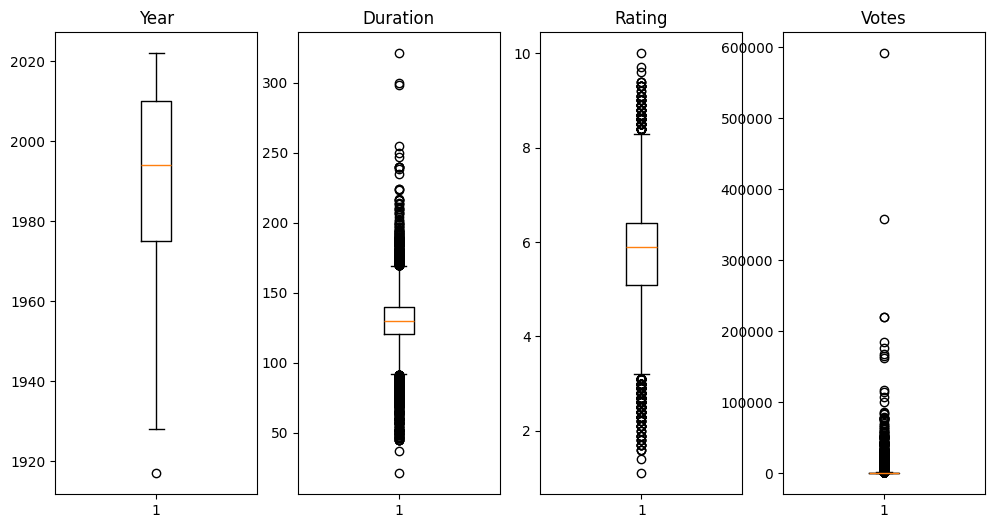

In [71]:
import matplotlib.pyplot as plt
numerical_features = ["Year", "Duration", "Rating", "Votes"]
# Create boxplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(12, 6)) # plot boxplot ของ age,avg_glucose_level,bmi ดูการกระจายของข้อมูล
for i, feature in enumerate(numerical_features):
    axes[i].boxplot(India_data_cleaned[feature])
    axes[i].set_title(feature)
plt.show()


In [72]:
India_data_cleaned[["Year", "Duration", "Rating", "Votes"]].describe()

Year      Duration        Rating          Votes
count  11646.000000  11646.000000  11646.000000   11646.000000
mean    1990.765488    129.179749      5.804781    1599.731547
std       22.478731     21.331965      1.161363    9699.050759
min     1917.000000     21.000000      1.100000       0.000000
25%     1975.000000    120.500000      5.100000      29.000000
50%     1994.000000    130.000000      5.900000      91.900000
75%     2010.000000    140.000000      6.400000     604.600000
max     2022.000000    321.000000     10.000000  591417.000000

In [73]:
India_data_cleaned

Name    Year  Duration  \
0                                 "space"  2017.0     120.5   
1      #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
2                             #Homecoming  2021.0      90.0   
3                                 #Yaaram  2019.0     110.0   
4                       ...And Once Again  2010.0     105.0   
...                                   ...     ...       ...   
15502                       Zulm Ki Pukar  1979.0     131.0   
15503                     Zulm Ki Zanjeer  1989.0     125.0   
15504                 Zulm Ko Jala Doonga  1988.0     131.0   
15505                               Zulmi  1999.0     129.0   
15508                        Zulm-O-Sitam  1998.0     130.0   

                      Genre  Rating   Votes            Director  \
0                     Drama     6.4   604.6       J.S. Randhawa   
1                     Drama     7.0     8.0       Gaurav Bakshi   
2            Drama, Musical     6.5  1736.9  Soumyajit Majumdar   
3           Comedy, Romance     4.4    35.0          Ovais Khan   
4                     Drama     6.4   604.6        Amol Palekar   
...                     ...     ...     ...                 ...   
15502                Action     5.1    44.4     Dinesh-Ramanesh   
15503  Action, Crime, Drama     5.8    44.0     S.P. Muthuraman   
15504                Action     4.6    11.0       Mahendra Shah   
15505         Action, Drama     4.5   655.0          Kuku Kohli   
15508         Action, Drama     6.2    20.0        K.C. Bokadia   

                Actor 1             Actor 2          Actor 3              Era  \
0              Manmauji              Birbal  Rajendra Bhatia    Streaming Era   
1          Rasika Dugal      Vivek Ghamande    Arvind Jangid    Streaming Era   
2          Sayani Gupta   Plabita Borthakur       Roy Angana    Streaming Era   
3               Prateik          Ishita Raj  Siddhant Kapoor    Streaming Era   
4          Rajat Kapoor  Rituparna Sengupta      Antara Mali    Streaming Era   
...                 ...                 ...              ...              ...   
15502       Ramesh Puri          Jalal Agha     Valerie Agha    New Hollywood   
15503       Chiranjeevi          Jayamalini      Rajinikanth  Blockbuster Era   
15504  Naseeruddin Shah       Sumeet Saigal    Suparna Anand  Blockbuster Era   
15505      Akshay Kumar      Twinkle Khanna      Aruna Irani  Blockbuster Era   
15508        Dharmendra          Jaya Prada      Arjun Sarja  Blockbuster Era   

      Duration_Category Rating_Quantiles Votes_Range  
0                  Long             Good      0-9999  
1                Medium        Excellent      0-9999  
2                Medium             Good      0-9999  
3                Medium             Poor      0-9999  
4                Medium             Good      0-9999  
...                 ...              ...         ...  
15502              Long             Poor      0-9999  
15503              Long          Average      0-9999  
15504              Long             Poor      0-9999  
15505              Long             Poor      0-9999  
15508              Long          Average      0-9999  

[11646 rows x 14 columns]

In [74]:
# convert categorical variables to numerical using one-hot encoding
cat_vars = ['Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range']  #'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range'
data_encoded = pd.get_dummies(India_data_cleaned, columns=cat_vars)

In [75]:
data_encoded

Name    Year  Duration  Rating   Votes  \
0                                 "space"  2017.0     120.5     6.4   604.6   
1      #Gadhvi (He thought he was Gandhi)  2019.0     109.0     7.0     8.0   
2                             #Homecoming  2021.0      90.0     6.5  1736.9   
3                                 #Yaaram  2019.0     110.0     4.4    35.0   
4                       ...And Once Again  2010.0     105.0     6.4   604.6   
...                                   ...     ...       ...     ...     ...   
15502                       Zulm Ki Pukar  1979.0     131.0     5.1    44.4   
15503                     Zulm Ki Zanjeer  1989.0     125.0     5.8    44.0   
15504                 Zulm Ko Jala Doonga  1988.0     131.0     4.6    11.0   
15505                               Zulmi  1999.0     129.0     4.5   655.0   
15508                        Zulm-O-Sitam  1998.0     130.0     6.2    20.0   

       Genre_Action  Genre_Action, Adventure  \
0             False                    False   
1             False                    False   
2             False                    False   
3             False                    False   
4             False                    False   
...             ...                      ...   
15502          True                    False   
15503         False                    False   
15504          True                    False   
15505         False                    False   
15508         False                    False   

       Genre_Action, Adventure, Biography  Genre_Action, Adventure, Comedy  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                            False   
...                                   ...                              ...   
15502                               False                            False   
15503                               False                            False   
15504                               False                            False   
15505                               False                            False   
15508                               False                            False   

       Genre_Action, Adventure, Crime  ...  Votes_Range_500000-509999  \
0                               False  ...                      False   
1                               False  ...                      False   
2                               False  ...                      False   
3                               False  ...                      False   
4                               False  ...                      False   
...                               ...  ...                        ...   
15502                           False  ...                      False   
15503                           False  ...                      False   
15504                           False  ...                      False   
15505                           False  ...                      False   
15508                           False  ...                      False   

       Votes_Range_510000-519999  Votes_Range_520000-529999  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   
...                          ...                        ...   
15502                      False                      False   
15503                      False                      False   
15504                      False                      False   
15505                      False                      False   
1550

In [76]:
data_apri = data_encoded.iloc[:,5:]
data_apri

Genre_Action  Genre_Action, Adventure  \
0             False                    False   
1             False                    False   
2             False                    False   
3             False                    False   
4             False                    False   
...             ...                      ...   
15502          True                    False   
15503         False                    False   
15504          True                    False   
15505         False                    False   
15508         False                    False   

       Genre_Action, Adventure, Biography  Genre_Action, Adventure, Comedy  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                            False   
...                                   ...                              ...   
15502                               False                            False   
15503                               False                            False   
15504                               False                            False   
15505                               False                            False   
15508                               False                            False   

       Genre_Action, Adventure, Crime  Genre_Action, Adventure, Drama  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
...                               ...                             ...   
15502                           False                           False   
15503                           False                           False   
15504                           False                           False   
15505                           False                           False   
15508                           False                           False   

       Genre_Action, Adventure, Family  Genre_Action, Adventure, Fantasy  \
0                                False                             False   
1                                False                             False   
2                                False                             False   
3                                False                             False   
4                                False                             False   
...                                ...                               ...   
15502                            False                             False   
15503                            False                             False   
15504                            False                             False   
15505                            False                             False   
15508                            False                             False   

       Genre_Action, Adventure, History  Genre_Action, Adventure, Horror  ...  \
0                                 False                            False  ...   
1                                 False                            False  ...   
2                                 False                            False  ...   
3                                 False                            False  ...   
4                                 False                            False  ...   
...                                 ...                              ...  ...   
15502                             False                            False  ...   
15503                             False                

In [77]:
apriori(data_apri, min_support=0.05, use_colnames=True)

NameError: name 'apriori' is not defined

In [78]:
data_apri.columns

Index(['Genre_Action', 'Genre_Action, Adventure',
       'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy',
       'Genre_Action, Adventure, Crime', 'Genre_Action, Adventure, Drama',
       'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy',
       'Genre_Action, Adventure, History', 'Genre_Action, Adventure, Horror',
       ...
       'Votes_Range_500000-509999', 'Votes_Range_510000-519999',
       'Votes_Range_520000-529999', 'Votes_Range_530000-539999',
       'Votes_Range_540000-549999', 'Votes_Range_550000-559999',
       'Votes_Range_560000-569999', 'Votes_Range_570000-579999',
       'Votes_Range_580000-589999', 'Votes_Range_590000-599999'],
      dtype='object', length=18286)

In [79]:
[col for col in data_apri.columns if col.startswith('Era')]

['Era_Silent Era',
 'Era_Early Sound Era',
 'Era_Golden Age of Hollywood',
 'Era_New Hollywood',
 'Era_Blockbuster Era',
 'Era_Internet Age',
 'Era_Streaming Era']

In [80]:
[col for col in data_apri.columns if col.startswith('Rating_Quantiles')]

['Rating_Quantiles_Poor',
 'Rating_Quantiles_Below Average',
 'Rating_Quantiles_Average',
 'Rating_Quantiles_Good',
 'Rating_Quantiles_Excellent']

In [81]:
[col for col in data_apri.columns if col.startswith('Votes_Range')]

['Votes_Range_0-9999',
 'Votes_Range_10000-19999',
 'Votes_Range_20000-29999',
 'Votes_Range_30000-39999',
 'Votes_Range_40000-49999',
 'Votes_Range_50000-59999',
 'Votes_Range_60000-69999',
 'Votes_Range_70000-79999',
 'Votes_Range_80000-89999',
 'Votes_Range_90000-99999',
 'Votes_Range_100000-109999',
 'Votes_Range_110000-119999',
 'Votes_Range_120000-129999',
 'Votes_Range_130000-139999',
 'Votes_Range_140000-149999',
 'Votes_Range_150000-159999',
 'Votes_Range_160000-169999',
 'Votes_Range_170000-179999',
 'Votes_Range_180000-189999',
 'Votes_Range_190000-199999',
 'Votes_Range_200000-209999',
 'Votes_Range_210000-219999',
 'Votes_Range_220000-229999',
 'Votes_Range_230000-239999',
 'Votes_Range_240000-249999',
 'Votes_Range_250000-259999',
 'Votes_Range_260000-269999',
 'Votes_Range_270000-279999',
 'Votes_Range_280000-289999',
 'Votes_Range_290000-299999',
 'Votes_Range_300000-309999',
 'Votes_Range_310000-319999',
 'Votes_Range_320000-329999',
 'Votes_Range_330000-339999',
 'Vot

In [82]:
[col for col in data_apri.columns if col.startswith('Duration')]

['Duration_Category_Short',
 'Duration_Category_Medium',
 'Duration_Category_Long',
 'Duration_Category_Epic']

In [83]:
[col for col in data_apri.columns if col.startswith('Rating_Quantiles')]

['Rating_Quantiles_Poor',
 'Rating_Quantiles_Below Average',
 'Rating_Quantiles_Average',
 'Rating_Quantiles_Good',
 'Rating_Quantiles_Excellent']

In [84]:
[col for col in data_apri.columns if col.startswith('Director')]

['Director_A B Arjun',
 'Director_A. Bhimsingh',
 'Director_A. Habib',
 'Director_A. Jagannathan',
 'Director_A. Karim',
 'Director_A. Kodandarami Reddy',
 'Director_A. Majid',
 'Director_A. Muthu',
 'Director_A. Raja',
 'Director_A. Rashid',
 'Director_A. Salaam',
 'Director_A. Shakoor',
 'Director_A. Shamsheer',
 'Director_A. Veerappan',
 'Director_A. Venkatesh',
 'Director_A. Zahoor',
 'Director_A.A. Darpan',
 'Director_A.C. Trilogchander',
 'Director_A.G. Surma',
 'Director_A.H. Essa',
 'Director_A.K. Bir',
 'Director_A.K. Hangal',
 'Director_A.K. Mishra',
 'Director_A.L. Vijay',
 'Director_A.M. Khan',
 'Director_A.M.R. Ramesh',
 'Director_A.N. Bannerjee',
 'Director_A.P. Nagarajan',
 'Director_A.P. Subbaraav',
 'Director_A.R. Kabuli',
 'Director_A.R. Murugadoss',
 'Director_A.R. Zamindar',
 'Director_A.S. Arora',
 'Director_A.T. Joy',
 'Director_A.T. Raghu',
 'Director_Aadesh Vishwakarma',
 'Director_Aadish Keluskar',
 'Director_Aakash Bhatia',
 'Director_Aakash Gupta',
 'Director

In [85]:
[col for col in data_apri.columns if col.startswith('Genre')][:10]

['Genre_Action',
 'Genre_Action, Adventure',
 'Genre_Action, Adventure, Biography',
 'Genre_Action, Adventure, Comedy',
 'Genre_Action, Adventure, Crime',
 'Genre_Action, Adventure, Drama',
 'Genre_Action, Adventure, Family',
 'Genre_Action, Adventure, Fantasy',
 'Genre_Action, Adventure, History',
 'Genre_Action, Adventure, Horror']

# เลือกเฉพาะ columns ที่สนใจ


In [86]:
selected_columns = [col for col in data_apri.columns if col.startswith('Director')] + \
                    [col for col in data_apri.columns if col.startswith('Genre')] + \
                    [col for col in data_apri.columns if col.startswith('Rating_Quantiles')]

In [87]:
len(selected_columns)

5206

In [88]:
data_selected = data_apri[selected_columns]
data_selected.shape

(11646, 5206)

# Run Apiori

In [89]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.001

# คำนวณ frequent itemsets
frequentItemsets = apriori(data_selected, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
#for index, rule in rules.iterrows():
 #   print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
   #       f"support={rule['support']}, "
    #      f"confidence={rule['confidence']}, "
     #     f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [90]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents  \
0                 (Director_Ajay Kashyap)   
1                 (Rating_Quantiles_Poor)   
2                  (Director_B.R. Chopra)   
3            (Rating_Quantiles_Excellent)   
4                  (Director_B.R. Ishara)   
..                                    ...   
271   (Director_B.R. Ishara, Genre_Drama)   
272  (Rating_Quantiles_Good, Genre_Drama)   
273                (Director_B.R. Ishara)   
274               (Rating_Quantiles_Good)   
275                         (Genre_Drama)   

                                       consequents  antecedent support  \
0                          (Rating_Quantiles_Poor)            0.001374   
1                          (Director_Ajay Kashyap)            0.273313   
2                     (Rating_Quantiles_Excellent)            0.001460   
3                           (Director_B.R. Chopra)            0.183840   
4                                    (Genre_Drama)            0.003435   
..                                             ...                 ...   
271                        (Rating_Quantiles_Good)            0.001374   
272                         (Director_B.R. Ishara)            0.111111   
273           (Rating_Quantiles_Good, Genre_Drama)            0.003435   
274            (Director_B.R. Ishara, Genre_Drama)            0.179547   
275  (Director_B.R. Ishara, Rating_Quantiles_Good)            0.194402   

     consequent support   support  confidence      lift  representativity  \
0              0.273313  0.001116    0.812500  2.972785               1.0   
1              0.001374  0.001116    0.004084  2.972785               1.0   
2              0.183840  0.001030    0.705882  3.839657               1.0   
3              0.001460  0.001030    0.005605  3.839657               1.0   
4              0.194402  0.001374    0.400000  2.057597               1.0   
..                  ...       ...         ...       ...               ...   
271            0.179547  0.001202    0.875000  4.873386               1.0   
272            0.003435  0.001202    0.010819  3.150000               1.0   
273            0.111111  0.001202    0.350000  3.150000               1.0   
274            0.001374  0.001202    0.006695  4.873386               1.0   
275            0.001460  0.001202    0.006184  4.236229               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0    0.000741    3.875665       0.664528  0.004080   0.741980    0.408292  
1    0.000741    1.002721       0.913206  0.004080   0.002714    0.408292  
2    0.000762    2.774944       0.740641  0.005592   0.639632    0.355744  
3    0.000762    1.004168       0.906146  0.005592   0.004151    0.355744  
4    0.000706    1.342664       0.515768  0.006993   0.255212    0.203534  
..        ...         ...            ...       ...        ...         ...  
271  0.000955    6.563627       0.795897  0.006689   0.847645    0.440848  
272  0.000821    1.007465       0.767857  0.010606   0.007410    0.180410  
273  0.000821    1.367521       0.684892  0.010606   0.268750    0.180410  
274  0.000955    1.005357       0.968737  0.006689   0.005329    0.440848  
275  0.000918    1.004753       0.948290  0.006176   0.004731    0.414857  

[276 rows x 14 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### แยกตามแต่ละยุค พิจารณา Rating_Quantiles_Excellent

##### Era_Silent

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Silent = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Silent.head(5)

Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0         False                    False                               False   
1         False                    False                               False   
2         False                    False                               False   
3         False                    False                               False   
4         False                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Genre_Action, Adventure, Fantasy  Genre_Action, Adventure, History  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Genre_Action, Adventure, Horror  ...  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                            False  ...          False                 False   
1                            False  ...          False                 False   
2                            False  ...          False                 False   
3                            False  ...          False                 False   
4                            False  ...          False                 False   

   Actor 3_Zubeida  Actor 3_Zuber K. Khan  Actor 3_Zulfi Sayed  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                False   
3            False                  False                False   
4            False                  False                False   

   Actor 3_Zunaid Memon  Era_Silent Era  Rating_Quantiles_Average  \
0                 False           False                     False   
1                 False           False                     False   
2                 False           False                     False   
3                 False           False                     False   
4                 False           False                     False   

   Rating_Quantiles_Good  Rating_Quantiles_Excellent  
0                   True                       False  
1                  False                        True  
2                   True                       False  
3                  False                       False  
4                   True                       False  

[5 rows x 18214 columns]

In [ ]:
data_apri_Era_Silent.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Silent, min_support=0.03, use_colnames=True)

<generator object apriori at 0x7f32906a0d60>

In [ ]:
frequentItemsets_Silent =  apriori(data_apri_Era_Silent, min_support=0.03, use_colnames=True)
frequentItemsets_Silent

<generator object apriori at 0x7f32906a0eb0>

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Silent = apriori(data_apri_Era_Silent, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Silent, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
print(rules_Genre)

                    antecedents    consequents  antecedent support  \
1       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
2  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
1            0.194402  0.111111    0.618843  3.183322               1.0   
2            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
2  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836  


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents    consequents  antecedent support  \
1       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
2  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
1            0.194402  0.111111    0.618843  3.183322               1.0   
2            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
2  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  \
0                 (Genre_Drama)       (Rating_Quantiles_Good)   
1       (Rating_Quantiles_Good)                 (Genre_Drama)   
2  (Rating_Quantiles_Excellent)                 (Genre_Drama)   
3                 (Genre_Drama)  (Rating_Quantiles_Excellent)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.194402            0.179547  0.111111    0.571555  3.183322   
1            0.179547            0.194402  0.111111    0.618843  3.183322   
2            0.183840            0.194402  0.038897    0.211583  1.088383   
3            0.194402            0.183840  0.038897    0.200088  1.088383   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.076207    1.914955       0.851370  0.422738   0.477795   
1               1.0  0.076207    2.113559       0.835956  0.422738   0.526864   
2               1.0  0.003159    1.021793       0.099498  0.114626   0.021328   
3               1.0  0.003159    1.020313       0.100802  0.114626   0.019908   

   kulczynski  
0    0.595199  
1    0.595199  
2    0.205836  
3    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  antecedent support  \
0  (Genre_Drama)       (Rating_Quantiles_Good)            0.194402   
3  (Genre_Drama)  (Rating_Quantiles_Excellent)            0.194402   

   consequent support   support  confidence      lift  representativity  \
0            0.179547  0.111111    0.571555  3.183322               1.0   
3            0.183840  0.038897    0.200088  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
3  0.003159    1.020313       0.100802  0.114626   0.019908    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:

# # Build association rules
# frequent_itemsets = apriori(tdata, min_support=0.01, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

##### Era_Early

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    # 'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Early = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Early.head(5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0         False                    False                               False   
1         False                    False                               False   
2         False                    False                               False   
3         False                    False                               False   
4         False                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Genre_Action, Adventure, Fantasy  Genre_Action, Adventure, History  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Genre_Action, Adventure, Horror  ...  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                            False  ...          False                 False   
1                            False  ...          False                 False   
2                            False  ...          False                 False   
3                            False  ...          False                 False   
4                            False  ...          False                 False   

   Actor 3_Zubeida  Actor 3_Zuber K. Khan  Actor 3_Zulfi Sayed  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                False   
3            False                  False                False   
4            False                  False                False   

   Actor 3_Zunaid Memon  Era_Early Sound Era  Rating_Quantiles_Average  \
0                 False                False                     False   
1                 False                False                     False   
2                 False                False                     False   
3                 False                False                     False   
4                 False                False                     False   

   Rating_Quantiles_Good  Rating_Quantiles_Excellent  
0                   True                       False  
1                  False                        True  
2                   True                       False  
3                  False                       False  
4                   True                       False  

[5 rows x 18214 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
data_apri_Era_Early.shape

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(11646, 18214)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
apriori(data_apri_Era_Early, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                   itemsets
0   0.088872                             (Genre_Action)
1   0.039842               (Genre_Action, Crime, Drama)
2   0.037180                             (Genre_Comedy)
3   0.194402                              (Genre_Drama)
4   0.036321                      (Genre_Drama, Family)
5   0.044994                     (Genre_Drama, Romance)
6   0.045423                            (Genre_Romance)
7   0.037695                           (Genre_Thriller)
8   0.231839                 (Rating_Quantiles_Average)
9   0.179547                    (Rating_Quantiles_Good)
10  0.183840               (Rating_Quantiles_Excellent)
11  0.111111       (Genre_Drama, Rating_Quantiles_Good)
12  0.038897  (Rating_Quantiles_Excellent, Genre_Drama)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
frequentItemsets_Early =  apriori(data_apri_Era_Early, min_support=0.03, use_colnames=True)
frequentItemsets_Early

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                   itemsets
0   0.088872                             (Genre_Action)
1   0.039842               (Genre_Action, Crime, Drama)
2   0.037180                             (Genre_Comedy)
3   0.194402                              (Genre_Drama)
4   0.036321                      (Genre_Drama, Family)
5   0.044994                     (Genre_Drama, Romance)
6   0.045423                            (Genre_Romance)
7   0.037695                           (Genre_Thriller)
8   0.231839                 (Rating_Quantiles_Average)
9   0.179547                    (Rating_Quantiles_Good)
10  0.183840               (Rating_Quantiles_Excellent)
11  0.111111       (Genre_Drama, Rating_Quantiles_Good)
12  0.038897  (Rating_Quantiles_Excellent, Genre_Drama)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Early = apriori(data_apri_Era_Early, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Early, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents    consequents  antecedent support  \
1       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
2  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
1            0.194402  0.111111    0.618843  3.183322               1.0   
2            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
2  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  antecedent support  \
0  (Genre_Drama)       (Rating_Quantiles_Good)            0.194402   
3  (Genre_Drama)  (Rating_Quantiles_Excellent)            0.194402   

   consequent support   support  confidence      lift  representativity  \
0            0.179547  0.111111    0.571555  3.183322               1.0   
3            0.183840  0.038897    0.200088  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
3  0.003159    1.020313       0.100802  0.114626   0.019908    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  \
0                 (Genre_Drama)       (Rating_Quantiles_Good)   
1       (Rating_Quantiles_Good)                 (Genre_Drama)   
2  (Rating_Quantiles_Excellent)                 (Genre_Drama)   
3                 (Genre_Drama)  (Rating_Quantiles_Excellent)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.194402            0.179547  0.111111    0.571555  3.183322   
1            0.179547            0.194402  0.111111    0.618843  3.183322   
2            0.183840            0.194402  0.038897    0.211583  1.088383   
3            0.194402            0.183840  0.038897    0.200088  1.088383   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.076207    1.914955       0.851370  0.422738   0.477795   
1               1.0  0.076207    2.113559       0.835956  0.422738   0.526864   
2               1.0  0.003159    1.021793       0.099498  0.114626   0.021328   
3               1.0  0.003159    1.020313       0.100802  0.114626   0.019908   

   kulczynski  
0    0.595199  
1    0.595199  
2    0.205836  
3    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:

# # Build association rules
# frequent_itemsets = apriori(tdata, min_support=0.01, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

##### Era_Golden

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    # 'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Golden = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Golden.head(5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0         False                    False                               False   
1         False                    False                               False   
2         False                    False                               False   
3         False                    False                               False   
4         False                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Genre_Action, Adventure, Fantasy  Genre_Action, Adventure, History  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Genre_Action, Adventure, Horror  ...  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                            False  ...          False                 False   
1                            False  ...          False                 False   
2                            False  ...          False                 False   
3                            False  ...          False                 False   
4                            False  ...          False                 False   

   Actor 3_Zubeida  Actor 3_Zuber K. Khan  Actor 3_Zulfi Sayed  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                False   
3            False                  False                False   
4            False                  False                False   

   Actor 3_Zunaid Memon  Era_Golden Age of Hollywood  \
0                 False                        False   
1                 False                        False   
2                 False                        False   
3                 False                        False   
4                 False                        False   

   Rating_Quantiles_Average  Rating_Quantiles_Good  Rating_Quantiles_Excellent  
0                     False                   True                       False  
1                     False                  False                        True  
2                     False                   True                       False  
3                     False                  False                       False  
4                     False                   True                       False  

[5 rows x 18214 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
data_apri_Era_Golden.shape

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(11646, 18214)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
apriori(data_apri_Era_Golden, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                           itemsets
0   0.088872                                     (Genre_Action)
1   0.039842                       (Genre_Action, Crime, Drama)
2   0.037180                                     (Genre_Comedy)
3   0.194402                                      (Genre_Drama)
4   0.036321                              (Genre_Drama, Family)
5   0.044994                             (Genre_Drama, Romance)
6   0.045423                                    (Genre_Romance)
7   0.037695                                   (Genre_Thriller)
8   0.102868                      (Era_Golden Age of Hollywood)
9   0.231839                         (Rating_Quantiles_Average)
10  0.179547                            (Rating_Quantiles_Good)
11  0.183840                       (Rating_Quantiles_Excellent)
12  0.111111               (Genre_Drama, Rating_Quantiles_Good)
13  0.038897          (Rating_Quantiles_Excellent, Genre_Drama)
14  0.032457  (Era_Golden Age of Hollywood, Rating_Quantiles...

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
frequentItemsets_Golden =  apriori(data_apri_Era_Golden, min_support=0.03, use_colnames=True)
frequentItemsets_Golden

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                           itemsets
0   0.088872                                     (Genre_Action)
1   0.039842                       (Genre_Action, Crime, Drama)
2   0.037180                                     (Genre_Comedy)
3   0.194402                                      (Genre_Drama)
4   0.036321                              (Genre_Drama, Family)
5   0.044994                             (Genre_Drama, Romance)
6   0.045423                                    (Genre_Romance)
7   0.037695                                   (Genre_Thriller)
8   0.102868                      (Era_Golden Age of Hollywood)
9   0.231839                         (Rating_Quantiles_Average)
10  0.179547                            (Rating_Quantiles_Good)
11  0.183840                       (Rating_Quantiles_Excellent)
12  0.111111               (Genre_Drama, Rating_Quantiles_Good)
13  0.038897          (Rating_Quantiles_Excellent, Genre_Drama)
14  0.032457  (Era_Golden Age of Hollywood, Rating_Quantiles...

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Golden = apriori(data_apri_Era_Golden, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Golden, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Era_Golden Age of Hollywood'}) + frozenset({'Rating_Quantiles_Average'}), support=0.03245749613601236, confidence=0.3155258764607679, lift=1.3609682804674457)
RelationRecord(items=frozenset({'Rating_Quantiles_Average'}) + frozenset({'Era_Golden Age of Hollywood'}),

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents    consequents  antecedent support  \
1       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
2  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
1            0.194402  0.111111    0.618843  3.183322               1.0   
2            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
2  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  antecedent support  \
0  (Genre_Drama)       (Rating_Quantiles_Good)            0.194402   
3  (Genre_Drama)  (Rating_Quantiles_Excellent)            0.194402   

   consequent support   support  confidence      lift  representativity  \
0            0.179547  0.111111    0.571555  3.183322               1.0   
3            0.183840  0.038897    0.200088  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
3  0.003159    1.020313       0.100802  0.114626   0.019908    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                    consequents  \
0                  (Genre_Drama)        (Rating_Quantiles_Good)   
1        (Rating_Quantiles_Good)                  (Genre_Drama)   
2   (Rating_Quantiles_Excellent)                  (Genre_Drama)   
3                  (Genre_Drama)   (Rating_Quantiles_Excellent)   
4  (Era_Golden Age of Hollywood)     (Rating_Quantiles_Average)   
5     (Rating_Quantiles_Average)  (Era_Golden Age of Hollywood)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.194402            0.179547  0.111111    0.571555  3.183322   
1            0.179547            0.194402  0.111111    0.618843  3.183322   
2            0.183840            0.194402  0.038897    0.211583  1.088383   
3            0.194402            0.183840  0.038897    0.200088  1.088383   
4            0.102868            0.231839  0.032457    0.315526  1.360968   
5            0.231839            0.102868  0.032457    0.140000  1.360968   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.076207    1.914955       0.851370  0.422738   0.477795   
1               1.0  0.076207    2.113559       0.835956  0.422738   0.526864   
2               1.0  0.003159    1.021793       0.099498  0.114626   0.021328   
3               1.0  0.003159    1.020313       0.100802  0.114626   0.019908   
4               1.0  0.008609    1.122264       0.295641  0.107386   0.108944   
5               1.0  0.008609    1.043177       0.345278  0.107386   0.041390   

   kulczynski  
0    0.595199  
1    0.595199  
2    0.205836  
3    0.205836  
4    0.227763  
5    0.227763

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


##### Era_Hollywood

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    # 'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Hollywood = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Hollywood.head(5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0         False                    False                               False   
1         False                    False                               False   
2         False                    False                               False   
3         False                    False                               False   
4         False                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Genre_Action, Adventure, Fantasy  Genre_Action, Adventure, History  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Genre_Action, Adventure, Horror  ...  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                            False  ...          False                 False   
1                            False  ...          False                 False   
2                            False  ...          False                 False   
3                            False  ...          False                 False   
4                            False  ...          False                 False   

   Actor 3_Zubeida  Actor 3_Zuber K. Khan  Actor 3_Zulfi Sayed  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                False   
3            False                  False                False   
4            False                  False                False   

   Actor 3_Zunaid Memon  Era_New Hollywood  Rating_Quantiles_Average  \
0                 False              False                     False   
1                 False              False                     False   
2                 False              False                     False   
3                 False              False                     False   
4                 False              False                     False   

   Rating_Quantiles_Good  Rating_Quantiles_Excellent  
0                   True                       False  
1                  False                        True  
2                   True                       False  
3                  False                       False  
4                   True                       False  

[5 rows x 18214 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
data_apri_Era_Hollywood.shape

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(11646, 18214)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
apriori(data_apri_Era_Hollywood, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                         itemsets
0   0.088872                                   (Genre_Action)
1   0.039842                     (Genre_Action, Crime, Drama)
2   0.037180                                   (Genre_Comedy)
3   0.194402                                    (Genre_Drama)
4   0.036321                            (Genre_Drama, Family)
5   0.044994                           (Genre_Drama, Romance)
6   0.045423                                  (Genre_Romance)
7   0.037695                                 (Genre_Thriller)
8   0.173278                              (Era_New Hollywood)
9   0.231839                       (Rating_Quantiles_Average)
10  0.179547                          (Rating_Quantiles_Good)
11  0.183840                     (Rating_Quantiles_Excellent)
12  0.031942                 (Genre_Drama, Era_New Hollywood)
13  0.111111             (Genre_Drama, Rating_Quantiles_Good)
14  0.038897        (Rating_Quantiles_Excellent, Genre_Drama)
15  0.045767    (Era_New Hollywood, Rating_Quantiles_Average)
16  0.042075       (Era_New Hollywood, Rating_Quantiles_Good)
17  0.043448  (Rating_Quantiles_Excellent, Era_New Hollywood)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
frequentItemsets_Hollywood =  apriori(data_apri_Era_Hollywood, min_support=0.03, use_colnames=True)
frequentItemsets_Hollywood

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                         itemsets
0   0.088872                                   (Genre_Action)
1   0.039842                     (Genre_Action, Crime, Drama)
2   0.037180                                   (Genre_Comedy)
3   0.194402                                    (Genre_Drama)
4   0.036321                            (Genre_Drama, Family)
5   0.044994                           (Genre_Drama, Romance)
6   0.045423                                  (Genre_Romance)
7   0.037695                                 (Genre_Thriller)
8   0.173278                              (Era_New Hollywood)
9   0.231839                       (Rating_Quantiles_Average)
10  0.179547                          (Rating_Quantiles_Good)
11  0.183840                     (Rating_Quantiles_Excellent)
12  0.031942                 (Genre_Drama, Era_New Hollywood)
13  0.111111             (Genre_Drama, Rating_Quantiles_Good)
14  0.038897        (Rating_Quantiles_Excellent, Genre_Drama)
15  0.045767    (Era_New Hollywood, Rating_Quantiles_Average)
16  0.042075       (Era_New Hollywood, Rating_Quantiles_Good)
17  0.043448  (Rating_Quantiles_Excellent, Era_New Hollywood)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Hollywood = apriori(data_apri_Era_Hollywood, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Hollywood, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Era_New Hollywood'}) + frozenset({'Rating_Quantiles_Average'}), support=0.04576678687961532, confidence=0.26412289395441035, lift=1.1392500825900234)
RelationRecord(items=frozenset({'Rating_Quantiles_Average'}) + frozenset({'Era_New Hollywood'}), support=0.04576678

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents    consequents  antecedent support  \
1       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
2  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
1            0.194402  0.111111    0.618843  3.183322               1.0   
2            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
2  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  antecedent support  \
0  (Genre_Drama)       (Rating_Quantiles_Good)            0.194402   
3  (Genre_Drama)  (Rating_Quantiles_Excellent)            0.194402   

   consequent support   support  confidence      lift  representativity  \
0            0.179547  0.111111    0.571555  3.183322               1.0   
3            0.183840  0.038897    0.200088  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
3  0.003159    1.020313       0.100802  0.114626   0.019908    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  \
0                 (Genre_Drama)       (Rating_Quantiles_Good)   
1       (Rating_Quantiles_Good)                 (Genre_Drama)   
2  (Rating_Quantiles_Excellent)                 (Genre_Drama)   
3                 (Genre_Drama)  (Rating_Quantiles_Excellent)   
4           (Era_New Hollywood)    (Rating_Quantiles_Average)   
5    (Rating_Quantiles_Average)           (Era_New Hollywood)   
6           (Era_New Hollywood)       (Rating_Quantiles_Good)   
7       (Rating_Quantiles_Good)           (Era_New Hollywood)   
8  (Rating_Quantiles_Excellent)           (Era_New Hollywood)   
9           (Era_New Hollywood)  (Rating_Quantiles_Excellent)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.194402            0.179547  0.111111    0.571555  3.183322   
1            0.179547            0.194402  0.111111    0.618843  3.183322   
2            0.183840            0.194402  0.038897    0.211583  1.088383   
3            0.194402            0.183840  0.038897    0.200088  1.088383   
4            0.173278            0.231839  0.045767    0.264123  1.139250   
5            0.231839            0.173278  0.045767    0.197407  1.139250   
6            0.173278            0.179547  0.042075    0.242815  1.352377   
7            0.179547            0.173278  0.042075    0.234338  1.352377   
8            0.183840            0.173278  0.043448    0.236338  1.363922   
9            0.173278            0.183840  0.043448    0.250743  1.363922   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.076207    1.914955       0.851370  0.422738   0.477795   
1               1.0  0.076207    2.113559       0.835956  0.422738   0.526864   
2               1.0  0.003159    1.021793       0.099498  0.114626   0.021328   
3               1.0  0.003159    1.020313       0.100802  0.114626   0.019908   
4               1.0  0.005594    1.043871       0.147849  0.127360   0.042027   
5               1.0  0.005594    1.030064       0.159120  0.127360   0.029186   
6               1.0  0.010963    1.083557       0.315174  0.135397   0.077114   
7               1.0  0.010963    1.079747       0.317582  0.135397   0.073857   
8               1.0  0.011593    1.082576       0.326921  0.138516   0.076277   
9               1.0  0.011593    1.089293       0.322745  0.138516   0.081973   

   kulczynski  
0    0.595199  
1    0.595199  
2    0.205836  
3    0.205836  
4    0.230765  
5    0.230765  
6    0.238576  
7    0.238576  
8    0.243541  
9    0.243541

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


##### Era_Blockbuster

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    # 'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Blockbuster = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Blockbuster.head(5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0         False                    False                               False   
1         False                    False                               False   
2         False                    False                               False   
3         False                    False                               False   
4         False                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Genre_Action, Adventure, Fantasy  Genre_Action, Adventure, History  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Genre_Action, Adventure, Horror  ...  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                            False  ...          False                 False   
1                            False  ...          False                 False   
2                            False  ...          False                 False   
3                            False  ...          False                 False   
4                            False  ...          False                 False   

   Actor 3_Zubeida  Actor 3_Zuber K. Khan  Actor 3_Zulfi Sayed  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                False   
3            False                  False                False   
4            False                  False                False   

   Actor 3_Zunaid Memon  Era_Blockbuster Era  Rating_Quantiles_Average  \
0                 False                False                     False   
1                 False                False                     False   
2                 False                False                     False   
3                 False                False                     False   
4                 False                False                     False   

   Rating_Quantiles_Good  Rating_Quantiles_Excellent  
0                   True                       False  
1                  False                        True  
2                   True                       False  
3                  False                       False  
4                   True                       False  

[5 rows x 18214 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
data_apri_Era_Blockbuster.shape

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(11646, 18214)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
apriori(data_apri_Era_Blockbuster, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                           itemsets
0   0.088872                                     (Genre_Action)
1   0.039842                       (Genre_Action, Crime, Drama)
2   0.037180                                     (Genre_Comedy)
3   0.194402                                      (Genre_Drama)
4   0.036321                              (Genre_Drama, Family)
5   0.044994                             (Genre_Drama, Romance)
6   0.045423                                    (Genre_Romance)
7   0.037695                                   (Genre_Thriller)
8   0.279581                              (Era_Blockbuster Era)
9   0.231839                         (Rating_Quantiles_Average)
10  0.179547                            (Rating_Quantiles_Good)
11  0.183840                       (Rating_Quantiles_Excellent)
12  0.038726                (Genre_Action, Era_Blockbuster Era)
13  0.054268                 (Genre_Drama, Era_Blockbuster Era)
14  0.111111               (Genre_Drama, Rating_Quantiles_Good)
15  0.038897          (Rating_Quantiles_Excellent, Genre_Drama)
16  0.058647    (Era_Blockbuster Era, Rating_Quantiles_Average)
17  0.047312       (Era_Blockbuster Era, Rating_Quantiles_Good)
18  0.035463  (Rating_Quantiles_Excellent, Era_Blockbuster Era)
19  0.031599  (Genre_Drama, Era_Blockbuster Era, Rating_Quan...

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
frequentItemsets_Blockbuster =  apriori(data_apri_Era_Blockbuster, min_support=0.03, use_colnames=True)
frequentItemsets_Blockbuster

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                           itemsets
0   0.088872                                     (Genre_Action)
1   0.039842                       (Genre_Action, Crime, Drama)
2   0.037180                                     (Genre_Comedy)
3   0.194402                                      (Genre_Drama)
4   0.036321                              (Genre_Drama, Family)
5   0.044994                             (Genre_Drama, Romance)
6   0.045423                                    (Genre_Romance)
7   0.037695                                   (Genre_Thriller)
8   0.279581                              (Era_Blockbuster Era)
9   0.231839                         (Rating_Quantiles_Average)
10  0.179547                            (Rating_Quantiles_Good)
11  0.183840                       (Rating_Quantiles_Excellent)
12  0.038726                (Genre_Action, Era_Blockbuster Era)
13  0.054268                 (Genre_Drama, Era_Blockbuster Era)
14  0.111111               (Genre_Drama, Rating_Quantiles_Good)
15  0.038897          (Rating_Quantiles_Excellent, Genre_Drama)
16  0.058647    (Era_Blockbuster Era, Rating_Quantiles_Average)
17  0.047312       (Era_Blockbuster Era, Rating_Quantiles_Good)
18  0.035463  (Rating_Quantiles_Excellent, Era_Blockbuster Era)
19  0.031599  (Genre_Drama, Era_Blockbuster Era, Rating_Quan...

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Blockbuster = apriori(data_apri_Era_Blockbuster, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Blockbuster, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

RelationRecord(items=frozenset({'Genre_Action'}) + frozenset({'Era_Blockbuster Era'}), support=0.03872574274428989, confidence=0.4357487922705314, lift=1.5585781433607524)
RelationRecord(items=frozenset({'Era_Blockbuster Era'}) + frozenset({'Genre_Action'}), support=0.03872574274428989, confidence=0.13851351351351354, lift=1.5585781433607524)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents  \
1                          (Era_Blockbuster Era)   
3                        (Rating_Quantiles_Good)   
4                   (Rating_Quantiles_Excellent)   
8   (Era_Blockbuster Era, Rating_Quantiles_Good)   
10                         (Era_Blockbuster Era)   
11                       (Rating_Quantiles_Good)   

                             consequents  antecedent support  \
1                         (Genre_Action)            0.279581   
3                          (Genre_Drama)            0.179547   
4                          (Genre_Drama)            0.183840   
8                          (Genre_Drama)            0.047312   
10  (Genre_Drama, Rating_Quantiles_Good)            0.279581   
11    (Genre_Drama, Era_Blockbuster Era)            0.179547   

    consequent support   support  confidence      lift  representativity  \
1             0.088872  0.038726    0.138514  1.558578               1.0   
3             0.194402  0.111111    0.618843  3.183322               1.0   
4             0.194402  0.038897    0.211583  1.088383               1.0   
8             0.194402  0.031599    0.667877  3.435552               1.0   
10            0.111111  0.031599    0.113022  1.017199               1.0   
11            0.054268  0.031599    0.175992  3.243049               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1   0.013879    1.057623       0.497474  0.117448   0.054484    0.287131  
3   0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
4   0.003159    1.021793       0.099498  0.114626   0.021328    0.205836  
8   0.022401    2.425600       0.744133  0.150388   0.587731    0.415210  
10  0.000534    1.002155       0.023470  0.087996   0.002150    0.198706  
11  0.021855    1.147723       0.843007  0.156263   0.128710    0.379135

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents  \
0                        (Genre_Action)   
2                         (Genre_Drama)   
5                         (Genre_Drama)   
6    (Genre_Drama, Era_Blockbuster Era)   
7  (Genre_Drama, Rating_Quantiles_Good)   
9                         (Genre_Drama)   

                                    consequents  antecedent support  \
0                         (Era_Blockbuster Era)            0.088872   
2                       (Rating_Quantiles_Good)            0.194402   
5                  (Rating_Quantiles_Excellent)            0.194402   
6                       (Rating_Quantiles_Good)            0.054268   
7                         (Era_Blockbuster Era)            0.111111   
9  (Era_Blockbuster Era, Rating_Quantiles_Good)            0.194402   

   consequent support   support  confidence      lift  representativity  \
0            0.279581  0.038726    0.435749  1.558578               1.0   
2            0.179547  0.111111    0.571555  3.183322               1.0   
5            0.183840  0.038897    0.200088  1.088383               1.0   
6            0.179547  0.031599    0.582278  3.243049               1.0   
7            0.279581  0.031599    0.284389  1.017199               1.0   
9            0.047312  0.031599    0.162544  3.435552               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.013879    1.276770       0.393347  0.117448   0.216774    0.287131  
2  0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
5  0.003159    1.020313       0.100802  0.114626   0.019908    0.205836  
6  0.021855    1.964116       0.731336  0.156263   0.490865    0.379135  
7  0.000534    1.006719       0.019022  0.087996   0.006675    0.198706  
9  0.022401    1.137597       0.879999  0.150388   0.120954    0.415210

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
rules_Genre = rules[
    (rules["consequents"].astype(str).str.contains("Genre")) &
    (rules["antecedents"].astype(str).str.contains("Rating"))
]

# แสดงผลลัพธ์ที่กรองแล้ว
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents  \
3                        (Rating_Quantiles_Good)   
4                   (Rating_Quantiles_Excellent)   
8   (Era_Blockbuster Era, Rating_Quantiles_Good)   
11                       (Rating_Quantiles_Good)   

                           consequents  antecedent support  \
3                        (Genre_Drama)            0.179547   
4                        (Genre_Drama)            0.183840   
8                        (Genre_Drama)            0.047312   
11  (Genre_Drama, Era_Blockbuster Era)            0.179547   

    consequent support   support  confidence      lift  representativity  \
3             0.194402  0.111111    0.618843  3.183322               1.0   
4             0.194402  0.038897    0.211583  1.088383               1.0   
8             0.194402  0.031599    0.667877  3.435552               1.0   
11            0.054268  0.031599    0.175992  3.243049               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
3   0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
4   0.003159    1.021793       0.099498  0.114626   0.021328    0.205836  
8   0.022401    2.425600       0.744133  0.150388   0.587731    0.415210  
11  0.021855    1.147723       0.843007  0.156263   0.128710    0.379135

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents  \
0                                 (Genre_Action)   
1                          (Era_Blockbuster Era)   
2                                  (Genre_Drama)   
3                        (Rating_Quantiles_Good)   
4                   (Rating_Quantiles_Excellent)   
5                                  (Genre_Drama)   
6             (Genre_Drama, Era_Blockbuster Era)   
7           (Genre_Drama, Rating_Quantiles_Good)   
8   (Era_Blockbuster Era, Rating_Quantiles_Good)   
9                                  (Genre_Drama)   
10                         (Era_Blockbuster Era)   
11                       (Rating_Quantiles_Good)   

                                     consequents  antecedent support  \
0                          (Era_Blockbuster Era)            0.088872   
1                                 (Genre_Action)            0.279581   
2                        (Rating_Quantiles_Good)            0.194402   
3                                  (Genre_Drama)            0.179547   
4                                  (Genre_Drama)            0.183840   
5                   (Rating_Quantiles_Excellent)            0.194402   
6                        (Rating_Quantiles_Good)            0.054268   
7                          (Era_Blockbuster Era)            0.111111   
8                                  (Genre_Drama)            0.047312   
9   (Era_Blockbuster Era, Rating_Quantiles_Good)            0.194402   
10          (Genre_Drama, Rating_Quantiles_Good)            0.279581   
11            (Genre_Drama, Era_Blockbuster Era)            0.179547   

    consequent support   support  confidence      lift  representativity  \
0             0.279581  0.038726    0.435749  1.558578               1.0   
1             0.088872  0.038726    0.138514  1.558578               1.0   
2             0.179547  0.111111    0.571555  3.183322               1.0   
3             0.194402  0.111111    0.618843  3.183322               1.0   
4             0.194402  0.038897    0.211583  1.088383               1.0   
5             0.183840  0.038897    0.200088  1.088383               1.0   
6             0.179547  0.031599    0.582278  3.243049               1.0   
7             0.279581  0.031599    0.284389  1.017199               1.0   
8             0.194402  0.031599    0.667877  3.435552               1.0   
9             0.047312  0.031599    0.162544  3.435552               1.0   
10            0.111111  0.031599    0.113022  1.017199               1.0   
11            0.054268  0.031599    0.175992  3.243049               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0   0.013879    1.276770       0.393347  0.117448   0.216774    0.287131  
1   0.013879    1.057623       0.497474  0.117448   0.054484    0.287131  
2   0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
3   0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
4   0.003159    1.021793       0.099498  0.114626   0.021328    0.205836  
5   0.003159    1.020313       0.100802  0.114626   0.019908    0.205836  
6   0.021855    1.964116       0.731336  0.156263   0.490865    0.379135  
7   0.000534    1.006719       0.019022  0.087996   0.006675    0.198706  
8   0.022401    2.425600       0.744133  0.150388   0.587731    0.415210  
9   0.022401    1.137597       0.879999  0.150388   0.120954    0.415210  
10  0.000534    1.002155       0.023470  0.087996   0.002150    0.198706  
11  0.021855    1.147723       0.843007  0.156263   0.128710    0.379135

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


##### Era_Internet

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    # 'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Internet = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Internet.head(5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0         False                    False                               False   
1         False                    False                               False   
2         False                    False                               False   
3         False                    False                               False   
4         False                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Genre_Action, Adventure, Fantasy  Genre_Action, Adventure, History  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Genre_Action, Adventure, Horror  ...  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                            False  ...          False                 False   
1                            False  ...          False                 False   
2                            False  ...          False                 False   
3                            False  ...          False                 False   
4                            False  ...          False                 False   

   Actor 3_Zubeida  Actor 3_Zuber K. Khan  Actor 3_Zulfi Sayed  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                False   
3            False                  False                False   
4            False                  False                False   

   Actor 3_Zunaid Memon  Era_Internet Age  Rating_Quantiles_Average  \
0                 False             False                     False   
1                 False             False                     False   
2                 False             False                     False   
3                 False             False                     False   
4                 False             False                     False   

   Rating_Quantiles_Good  Rating_Quantiles_Excellent  
0                   True                       False  
1                  False                        True  
2                   True                       False  
3                  False                       False  
4                   True                       False  

[5 rows x 18214 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
data_apri_Era_Internet.shape

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(11646, 18214)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
apriori(data_apri_Era_Internet, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                   itemsets
0   0.088872                             (Genre_Action)
1   0.039842               (Genre_Action, Crime, Drama)
2   0.037180                             (Genre_Comedy)
3   0.194402                              (Genre_Drama)
4   0.036321                      (Genre_Drama, Family)
5   0.044994                     (Genre_Drama, Romance)
6   0.045423                            (Genre_Romance)
7   0.037695                           (Genre_Thriller)
8   0.165722                         (Era_Internet Age)
9   0.231839                 (Rating_Quantiles_Average)
10  0.179547                    (Rating_Quantiles_Good)
11  0.183840               (Rating_Quantiles_Excellent)
12  0.111111       (Genre_Drama, Rating_Quantiles_Good)
13  0.038897  (Rating_Quantiles_Excellent, Genre_Drama)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
frequentItemsets_Internet =  apriori(data_apri_Era_Internet, min_support=0.03, use_colnames=True)
frequentItemsets_Internet

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                   itemsets
0   0.088872                             (Genre_Action)
1   0.039842               (Genre_Action, Crime, Drama)
2   0.037180                             (Genre_Comedy)
3   0.194402                              (Genre_Drama)
4   0.036321                      (Genre_Drama, Family)
5   0.044994                     (Genre_Drama, Romance)
6   0.045423                            (Genre_Romance)
7   0.037695                           (Genre_Thriller)
8   0.165722                         (Era_Internet Age)
9   0.231839                 (Rating_Quantiles_Average)
10  0.179547                    (Rating_Quantiles_Good)
11  0.183840               (Rating_Quantiles_Excellent)
12  0.111111       (Genre_Drama, Rating_Quantiles_Good)
13  0.038897  (Rating_Quantiles_Excellent, Genre_Drama)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Internet = apriori(data_apri_Era_Internet, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Internet, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents    consequents  antecedent support  \
1       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
2  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
1            0.194402  0.111111    0.618843  3.183322               1.0   
2            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
2  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  antecedent support  \
0  (Genre_Drama)       (Rating_Quantiles_Good)            0.194402   
3  (Genre_Drama)  (Rating_Quantiles_Excellent)            0.194402   

   consequent support   support  confidence      lift  representativity  \
0            0.179547  0.111111    0.571555  3.183322               1.0   
3            0.183840  0.038897    0.200088  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
3  0.003159    1.020313       0.100802  0.114626   0.019908    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  \
0                 (Genre_Drama)       (Rating_Quantiles_Good)   
1       (Rating_Quantiles_Good)                 (Genre_Drama)   
2  (Rating_Quantiles_Excellent)                 (Genre_Drama)   
3                 (Genre_Drama)  (Rating_Quantiles_Excellent)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.194402            0.179547  0.111111    0.571555  3.183322   
1            0.179547            0.194402  0.111111    0.618843  3.183322   
2            0.183840            0.194402  0.038897    0.211583  1.088383   
3            0.194402            0.183840  0.038897    0.200088  1.088383   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.076207    1.914955       0.851370  0.422738   0.477795   
1               1.0  0.076207    2.113559       0.835956  0.422738   0.526864   
2               1.0  0.003159    1.021793       0.099498  0.114626   0.021328   
3               1.0  0.003159    1.020313       0.100802  0.114626   0.019908   

   kulczynski  
0    0.595199  
1    0.595199  
2    0.205836  
3    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["consequents"].astype(str).str.contains("Genre")) &
#     (rules["antecedents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

##### Era_Streaming

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    # 'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Streaming = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Streaming.head(5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0         False                    False                               False   
1         False                    False                               False   
2         False                    False                               False   
3         False                    False                               False   
4         False                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Genre_Action, Adventure, Fantasy  Genre_Action, Adventure, History  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Genre_Action, Adventure, Horror  ...  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                            False  ...          False                 False   
1                            False  ...          False                 False   
2                            False  ...          False                 False   
3                            False  ...          False                 False   
4                            False  ...          False                 False   

   Actor 3_Zubeida  Actor 3_Zuber K. Khan  Actor 3_Zulfi Sayed  \
0            False                  False                False   
1            False                  False                False   
2            False                  False                False   
3            False                  False                False   
4            False                  False                False   

   Actor 3_Zunaid Memon  Era_Streaming Era  Rating_Quantiles_Average  \
0                 False               True                     False   
1                 False               True                     False   
2                 False               True                     False   
3                 False               True                     False   
4                 False               True                     False   

   Rating_Quantiles_Good  Rating_Quantiles_Excellent  
0                   True                       False  
1                  False                        True  
2                   True                       False  
3                  False                       False  
4                   True                       False  

[5 rows x 18214 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
data_apri_Era_Streaming.shape

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(11646, 18214)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
apriori(data_apri_Era_Streaming, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                         itemsets
0   0.088872                                   (Genre_Action)
1   0.039842                     (Genre_Action, Crime, Drama)
2   0.037180                                   (Genre_Comedy)
3   0.194402                                    (Genre_Drama)
4   0.036321                            (Genre_Drama, Family)
5   0.044994                           (Genre_Drama, Romance)
6   0.045423                                  (Genre_Romance)
7   0.037695                                 (Genre_Thriller)
8   0.261807                              (Era_Streaming Era)
9   0.231839                       (Rating_Quantiles_Average)
10  0.179547                          (Rating_Quantiles_Good)
11  0.183840                     (Rating_Quantiles_Excellent)
12  0.056328                 (Genre_Drama, Era_Streaming Era)
13  0.111111             (Genre_Drama, Rating_Quantiles_Good)
14  0.038897        (Rating_Quantiles_Excellent, Genre_Drama)
15  0.060622    (Era_Streaming Era, Rating_Quantiles_Average)
16  0.042676       (Rating_Quantiles_Good, Era_Streaming Era)
17  0.060708  (Rating_Quantiles_Excellent, Era_Streaming Era)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
frequentItemsets_Streaming =  apriori(data_apri_Era_Streaming, min_support=0.03, use_colnames=True)
frequentItemsets_Streaming

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                                         itemsets
0   0.088872                                   (Genre_Action)
1   0.039842                     (Genre_Action, Crime, Drama)
2   0.037180                                   (Genre_Comedy)
3   0.194402                                    (Genre_Drama)
4   0.036321                            (Genre_Drama, Family)
5   0.044994                           (Genre_Drama, Romance)
6   0.045423                                  (Genre_Romance)
7   0.037695                                 (Genre_Thriller)
8   0.261807                              (Era_Streaming Era)
9   0.231839                       (Rating_Quantiles_Average)
10  0.179547                          (Rating_Quantiles_Good)
11  0.183840                     (Rating_Quantiles_Excellent)
12  0.056328                 (Genre_Drama, Era_Streaming Era)
13  0.111111             (Genre_Drama, Rating_Quantiles_Good)
14  0.038897        (Rating_Quantiles_Excellent, Genre_Drama)
15  0.060622    (Era_Streaming Era, Rating_Quantiles_Average)
16  0.042676       (Rating_Quantiles_Good, Era_Streaming Era)
17  0.060708  (Rating_Quantiles_Excellent, Era_Streaming Era)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Streaming = apriori(data_apri_Era_Streaming, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Streaming, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Era_Streaming Era'}), support=0.05632835308260347, confidence=0.28975265017667845, lift=1.1067429858831082)
RelationRecord(items=frozenset({'Era_Streaming Era'}) + frozenset({'Genre_Drama'}), support=0.05632835308260347, confidence=0.2151525090193506, lift=1.1067429858831082)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.200

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents    consequents  antecedent support  \
1           (Era_Streaming Era)  (Genre_Drama)            0.261807   
3       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
4  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
1            0.194402  0.056328    0.215153  1.106743               1.0   
3            0.194402  0.111111    0.618843  3.183322               1.0   
4            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1  0.005433    1.026440       0.130654  0.140863   0.025758    0.252453  
3  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
4  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  antecedent support  \
0  (Genre_Drama)           (Era_Streaming Era)            0.194402   
2  (Genre_Drama)       (Rating_Quantiles_Good)            0.194402   
5  (Genre_Drama)  (Rating_Quantiles_Excellent)            0.194402   

   consequent support   support  confidence      lift  representativity  \
0            0.261807  0.056328    0.289753  1.106743               1.0   
2            0.179547  0.111111    0.571555  3.183322               1.0   
5            0.183840  0.038897    0.200088  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.005433    1.039347       0.119722  0.140863   0.037857    0.252453  
2  0.076207    1.914955       0.851370  0.422738   0.477795    0.595199  
5  0.003159    1.020313       0.100802  0.114626   0.019908    0.205836

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents                   consequents  \
0                 (Genre_Drama)           (Era_Streaming Era)   
1           (Era_Streaming Era)                 (Genre_Drama)   
2                 (Genre_Drama)       (Rating_Quantiles_Good)   
3       (Rating_Quantiles_Good)                 (Genre_Drama)   
4  (Rating_Quantiles_Excellent)                 (Genre_Drama)   
5                 (Genre_Drama)  (Rating_Quantiles_Excellent)   
6  (Rating_Quantiles_Excellent)           (Era_Streaming Era)   
7           (Era_Streaming Era)  (Rating_Quantiles_Excellent)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.194402            0.261807  0.056328    0.289753  1.106743   
1            0.261807            0.194402  0.056328    0.215153  1.106743   
2            0.194402            0.179547  0.111111    0.571555  3.183322   
3            0.179547            0.194402  0.111111    0.618843  3.183322   
4            0.183840            0.194402  0.038897    0.211583  1.088383   
5            0.194402            0.183840  0.038897    0.200088  1.088383   
6            0.183840            0.261807  0.060708    0.330220  1.261311   
7            0.261807            0.183840  0.060708    0.231879  1.261311   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.005433    1.039347       0.119722  0.140863   0.037857   
1               1.0  0.005433    1.026440       0.130654  0.140863   0.025758   
2               1.0  0.076207    1.914955       0.851370  0.422738   0.477795   
3               1.0  0.076207    2.113559       0.835956  0.422738   0.526864   
4               1.0  0.003159    1.021793       0.099498  0.114626   0.021328   
5               1.0  0.003159    1.020313       0.100802  0.114626   0.019908   
6               1.0  0.012577    1.102142       0.253840  0.157707   0.092676   
7               1.0  0.012577    1.062541       0.280650  0.157707   0.058860   

   kulczynski  
0    0.252453  
1    0.252453  
2    0.595199  
3    0.595199  
4    0.205836  
5    0.205836  
6    0.281049  
7    0.281049

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["consequents"].astype(str).str.contains("Genre")) &
#     (rules["antecedents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Director actor

In [ ]:
# convert categorical variables to numerical using one-hot encoding
da = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']  #'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range'
data_da = pd.get_dummies(India_data_cleaned, columns=da)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
data_da

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Name    Year  Duration  \
0                                 "space"  2017.0     120.5   
1      #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
2                             #Homecoming  2021.0      90.0   
3                                 #Yaaram  2019.0     110.0   
4                       ...And Once Again  2010.0     105.0   
...                                   ...     ...       ...   
15502                       Zulm Ki Pukar  1979.0     131.0   
15503                     Zulm Ki Zanjeer  1989.0     125.0   
15504                 Zulm Ko Jala Doonga  1988.0     131.0   
15505                               Zulmi  1999.0     129.0   
15508                        Zulm-O-Sitam  1998.0     130.0   

                      Genre  Rating   Votes              Era  \
0                     Drama     6.4   604.6    Streaming Era   
1                     Drama     7.0     8.0    Streaming Era   
2            Drama, Musical     6.5  1736.9    Streaming Era   
3           Comedy, Romance     4.4    35.0    Streaming Era   
4                     Drama     6.4   604.6    Streaming Era   
...                     ...     ...     ...              ...   
15502                Action     5.1    44.4    New Hollywood   
15503  Action, Crime, Drama     5.8    44.0  Blockbuster Era   
15504                Action     4.6    11.0  Blockbuster Era   
15505         Action, Drama     4.5   655.0  Blockbuster Era   
15508         Action, Drama     6.2    20.0  Blockbuster Era   

      Duration_Category Rating_Quantiles Votes_Range  ...  \
0                  Long             Good      0-9999  ...   
1                Medium        Excellent      0-9999  ...   
2                Medium             Good      0-9999  ...   
3                Medium             Poor      0-9999  ...   
4                Medium             Good      0-9999  ...   
...                 ...              ...         ...  ...   
15502              Long             Poor      0-9999  ...   
15503              Long          Average      0-9999  ...   
15504              Long             Poor      0-9999  ...   
15505              Long             Poor      0-9999  ...   
15508              Long          Average      0-9999  ...   

       Actor 3_Zeenat Aman  Actor 3_Zeeshan Khan  Actor 3_Zeishan Quadri  \
0                    False                 False                   False   
1                    False                 False                   False   
2                    False                 False                   False   
3                    False                 False                   False   
4                    False                 False                   False   
...                    ...                   ...                     ...   
15502                False                 False                   False   
15503                False                 False                   False   
15504                False                 False                   False   
15505                False                 False                   False   
15508                False                 False                   False   

       Actor 3_Zenobia Shroff  Actor 3_Zohra  Actor 3_Zoya Hussain  \
0                       False          False                 False   
1                       False          False                 False   
2                       False          False                 False   
3                       False          False                 False   
4                       False          False                 False   
...                       ...            ...                   ...   
15502                   False          False                 False   
15503                   False          False                 False   
15504                   False          False                 False   
15505                   False          False                 False   
15508                   False          False                 False   

       Actor 3_Zubeida  

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
data_da_apri = data_da.iloc[:,10:]
data_da_apri

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Director_A B Arjun  Director_A. Bhimsingh  Director_A. Habib  \
0                   False                  False              False   
1                   False                  False              False   
2                   False                  False              False   
3                   False                  False              False   
4                   False                  False              False   
...                   ...                    ...                ...   
15502               False                  False              False   
15503               False                  False              False   
15504               False                  False              False   
15505               False                  False              False   
15508               False                  False              False   

       Director_A. Jagannathan  Director_A. Karim  \
0                        False              False   
1                        False              False   
2                        False              False   
3                        False              False   
4                        False              False   
...                        ...                ...   
15502                    False              False   
15503                    False              False   
15504                    False              False   
15505                    False              False   
15508                    False              False   

       Director_A. Kodandarami Reddy  Director_A. Majid  Director_A. Muthu  \
0                              False              False              False   
1                              False              False              False   
2                              False              False              False   
3                              False              False              False   
4                              False              False              False   
...                              ...                ...                ...   
15502                          False              False              False   
15503                          False              False              False   
15504                          False              False              False   
15505                          False              False              False   
15508                          False              False              False   

       Director_A. Raja  Director_A. Rashid  ...  Actor 3_Zeenat Aman  \
0                 False               False  ...                False   
1                 False               False  ...                False   
2                 False               False  ...                False   
3                 False               False  ...                False   
4                 False               False  ...                False   
...                 ...                 ...  ...                  ...   
15502             False               False  ...                False   
15503             False               False  ...                False   
15504             False               False  ...                False   
15505             False               False  ...                False   
15508             False               False  ...                False   

       Actor 3_Zeeshan Khan  Actor 3_Zeishan Quadri  Actor 3_Zenobia Shroff  \
0                     False                   False                   False   
1                     False                   False                   False   
2                     False                   False                   False   
3                     False                   False                   False   
4                     False                   False                   False   
...                     ...                     ...                     ...   
15502                 False                   False                   False   
15503                 False                   False                   F

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
apriori(data_da_apri, min_support=0.005, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

support                      itemsets
0   0.006182          (Actor 1_Ajay Devgn)
1   0.007470        (Actor 1_Akshay Kumar)
2   0.010562    (Actor 1_Amitabh Bachchan)
3   0.012880         (Actor 1_Ashok Kumar)
4   0.007728           (Actor 1_Dev Anand)
5   0.012021          (Actor 1_Dharmendra)
6   0.005839             (Actor 1_Govinda)
7   0.012021           (Actor 1_Jeetendra)
8   0.011420  (Actor 1_Mithun Chakraborty)
9   0.010218       (Actor 1_Rajesh Khanna)
10  0.005152        (Actor 1_Rishi Kapoor)
11  0.006354         (Actor 1_Sanjay Dutt)
12  0.007041       (Actor 1_Sanjeev Kumar)
13  0.007814       (Actor 1_Shashi Kapoor)
14  0.005753          (Actor 1_Sunil Dutt)
15  0.005152          (Actor 1_Sunny Deol)
16  0.005152          (Actor 2_Dharmendra)
17  0.006182         (Actor 2_Hema Malini)
18  0.005410  (Actor 2_Mithun Chakraborty)
19  0.007041               (Actor 2_Rekha)
20  0.005324         (Actor 3_Anupam Kher)
21  0.007385                (Actor 3_Pran)
22  0.005495       (Actor 3_Shakti Kapoor)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
frequentItemsets_da =  apriori(data_da_apri, min_support=0.001, use_colnames=True)
frequentItemsets_da

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.001

# คำนวณ frequent itemsets
frequentItemsets_da = apriori(data_da_apri, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_da, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Directo")]

# print the resulting rules
rules_Genre

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Directo")]

# print the resulting rules
rules_Genre

In [ ]:
rules

In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["consequents"].astype(str).str.contains("Genre")) &
#     (rules["antecedents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre